# Applied Statistics Project - Divya Dhaipullay (Divya D)

- Importing all the necessary libraries

In [1]:
import pandas as pd # importing necessary libaries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches 
sns.set(color_codes=True)
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
from statsmodels.stats.power import ttest_power
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('always', category=UserWarning)

#### Have a look at the url once, please!
- this warning is already patched, no stable release contains it yet. 
    #Look at the comment of @russtoku for a temporary manual patch until the official release 😉
    #https://github.com/mwaskom/seaborn/issues/1380

- %matplotlib inline sets the backend of matplotlib to the 'inline' backend without calling plt.show() for all plots
-  sns.set(color_codes=True)to make Seaborn's asthetic parameters alive

1. Please refer the table below to answer below questions: [2 Marks]


|Planned to purchase Product A| Actually placed an order for Product A - Yes| Actually placed an order for Product A - No|Total|
|--|--|--|--|
|Yes|400|200|600|
|No|1000|1300|1400|
|Total|500|1500|2000|

Probability of A given B is written as P(A | B).

$P(A\mid B) = \frac{P(A \quad and \quad B)}{P(B)}$

where P(A and B) = Joint probability of A and B
*     P(A)       = Marginal probability of A
*     P(B)       = Marginal probability of B

1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order. [1 Mark]

In [2]:
people_panned_and_actually_purchased = 400
total_people  = 2000
people_planned_to_purchase = 500
jointProbab_1A = round((people_panned_and_actually_purchased/total_people),4)
jointProbabPercentage_1A = jointProbab_1A * 100
print('Joint probability of the people who planned to purchase and actually placed an order. is %1.4f' % jointProbab_1A)
print('Joint probability of the people who planned to purchase and actually placed an order. in percentage is %1.4f' % jointProbabPercentage_1A, '%')
#400/2000 # there are 400 people who people who planned to purchase and actually placed an order for product A
# here our universe is 2000 which is the Total

Joint probability of the people who planned to purchase and actually placed an order. is 0.2000
Joint probability of the people who planned to purchase and actually placed an order. in percentage is 20.0000 %


1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that 
people planned to purchase. [1 Mark]

In [3]:
# P1 = P(Actually placed an order | Planned to purchase)
# P2 = Planned to purchase and actually placed an order
# P3 = Planned to purchase
jointProbab_1B = round((people_panned_and_actually_purchased/people_planned_to_purchase),4)
jointProbabPercentage_1B = jointProbab_1B * 100 
print('Joint probability of the people who planned to purchase and actually placed an order. is %1.4f' % jointProbab_1B)
print('Joint probability of the people who planned to purchase and actually placed an order. in percentage is %1.4f' % jointProbabPercentage_1B, '%')#400/500 # there are 400 people who people who planned to purchase and actually placed an order for product A
# here our universe is 500 which is the Total number of people who planned to purchase

Joint probability of the people who planned to purchase and actually placed an order. is 0.8000
Joint probability of the people who planned to purchase and actually placed an order. in percentage is 80.0000 %


This a Binomial Distribution Problem

2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions. [4 Marks]

2.A. Probability that none of the items are defective? [1 Mark]

In [4]:
p   =  0.05 # failure rate for LED light bulbs that the company manufactures is 5%
n   =  10 # sample size
k   =  np.arange(0,11) # An array of quantiles

In [5]:
binomial = stats.binom.pmf(k,n,p)
binomial

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789063e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14])

In [6]:
# 2.A. Probability that none of the items are defective?
probab_no_defect = round(stats.binom.pmf(0, 10, 0.05),4)

In [7]:
# 2.B. Probability that exactly one of the items is defective?
probab_one_defect = round(stats.binom.pmf(1, 10, 0.05),4)

In [8]:
# 2.C. Probability that two or fewer of the items are defective?
    # i.e  -> binom_probability_no_defect + binom_probability_one_defect + binom_probability_two_defect
    # stats.binom.pmf(0, 10, 0.05) + stats.binom.pmf(1, 10, 0.05) + stats.binom.pmf(2, 10, 0.05)
    # Or we can use *cdf*function
probab_two_or_less = round(stats.binom.cdf(2, 10, 0.05),4)

In [9]:
# 2.D. Probability that three or more of the items are defective ?
    # nothing but (1-binom_probability_two_or_less)
probab_three_or_more = round((1-probab_two_or_less),4)

In [10]:
print('2.A. Probability that none of the items are defective is', probab_no_defect, 'which in percentage is', round(probab_no_defect*100,2), '%')
print('2.B. Probability that exactly one of the items is defective is', probab_one_defect, 'which in percentage is ', round(probab_one_defect*100,2), '%')
print('2.C. Probability that two or fewer of the items are defective is', probab_two_or_less, 'which in percentage is ', round(probab_two_or_less*100,2), '%')
print('2.D. Probability that three or more of the items are defective is', probab_three_or_more, 'which in percentage is ', round(probab_three_or_more*100,2), '%')

2.A. Probability that none of the items are defective is 0.5987 which in percentage is 59.87 %
2.B. Probability that exactly one of the items is defective is 0.3151 which in percentage is  31.51 %
2.C. Probability that two or fewer of the items are defective is 0.9885 which in percentage is  98.85 %
2.D. Probability that three or more of the items are defective is 0.0115 which in percentage is  1.15 %


In [11]:
### few other ways of doing the same problem are shown below

In [12]:
print('a) None of the LED bulbs are defective? is %1.4f' %binomial[0]) # none is defective

a) None of the LED bulbs are defective? is 0.5987


In [13]:
sum(binomial)

1.0000000000000002

2.B. Probability that exactly one of the items is defective? [1 Mark]

In [14]:
print('b) Exactly one of the LED bulbs is defective? is %1.4f' %binomial[1])

b) Exactly one of the LED bulbs is defective? is 0.3151


2.C. Probability that two or fewer of the items are defective? [1 Mark]

In [15]:
cumbinomial = stats.binom.cdf(k,n,p)
print(cumbinomial)

[0.59873694 0.91386164 0.98849644 0.9989715  0.99993631 0.99999725
 0.99999992 1.         1.         1.         1.        ]


In [16]:
print('c) Two or fewer of the LED bulbs are defective? is %1.4f' %cumbinomial[2])

c) Two or fewer of the LED bulbs are defective? is 0.9885


In [17]:
#other way
binomial[0] +binomial[1]+binomial[2]

0.9884964426207035

In [18]:
# another way
1 -  (binomial[3] + binomial[4]+ binomial[5]+ binomial[6]+binomial[7] + binomial[8] + binomial[9]+ binomial[10])

0.9884964426207031

2.D. Probability that three or more of the items are defective ? [1 Mark]

In [19]:
P = 1- cumbinomial[2]
print('d) Three or more of the LED bulbs are defective is %1.4f' % P)

d) Three or more of the LED bulbs are defective is 0.0115


In [20]:
#other way
binomial[3] + binomial[4]+ binomial[5]+ binomial[6]+binomial[7]+ binomial[8] + binomial[9]+ binomial[10]

0.011503557379296881

In [21]:
# other way 
1 - (binomial[0] +binomial[1]+binomial[2])

0.011503557379296536

This is POISSON DISTRIBUTION problem as average is provided instead of actual probability & sample size

3. A car salesman sells on an average 3 cars per week. [3 Marks]

3.A. What is Probability that in a given week he will sell some cars? [1 Mark]

In [22]:
# 3.A. What is Probability that in a given week he will sell some cars? 
probab_some_cars = round(1-stats.poisson.cdf(0, 3),4)

# p1 - Upto 4 cars
P1 = stats.poisson.cdf(4, 3)

#p2 - Upto 1 car
P2 = stats.poisson.cdf(1, 3)

probab_two_to_five = round((P1-P2), 4)

print('3.A. Probability that in a given week he will sell some cars is ', probab_some_cars, 'i.e ', round(probab_some_cars*100, 2), '%')
print('3.B. Probability that in a given week he will sell 2 or more but less than 5 cars is ', probab_two_to_five, 'i.e ', round(probab_two_to_five*100, 2), '%')

3.A. Probability that in a given week he will sell some cars is  0.9502 i.e  95.02 %
3.B. Probability that in a given week he will sell 2 or more but less than 5 cars is  0.6161 i.e  61.61 %


Below are a few other ways of doing it

In [23]:
rate =  3 # which is the mean
n    =  np.arange(0,16)
cumpoisson = stats.poisson.cdf(n,rate)
cumpoisson

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
       0.99970766, 0.99992861, 0.99998385, 0.9999966 , 0.99999933,
       0.99999988])

In [24]:
# P = probability that the agent sells some policies
P   = 1 - cumpoisson[0]
print(' a) Probability that the agent sells some policies is %1.4f' % P)

 a) Probability that the agent sells some policies is 0.9502


3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? [1 Mark]

In [25]:
# Let P1 be the probability that the agent sells more than 4 policies
P1 = cumpoisson[4] # P(X >=4)
# Let P2 be the probability that the agent sells more than 1 policy
P2 = cumpoisson[1] # P(X >=1)
P = P1 - P2 # Prob. that the agent will sell between 2 and 5 policies
print(' b) Probability that the agent sells between 2 and 5 policies is %1.4f' % P)

 b) Probability that the agent sells between 2 and 5 policies is 0.6161


3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. [1 Mark]

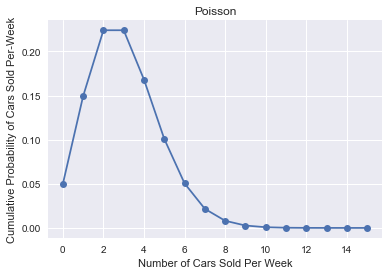

In [26]:
poisson = stats.poisson.pmf(n,rate)
plt.plot(n,poisson, 'o-')
plt.title('Poisson')
plt.ylabel('Cumulative Probability of Cars Sold Per-Week')
plt.xlabel('Number of Cars Sold Per Week')
plt.show()

4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, 
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions. [3 Marks]

4.A. What is the probability that all three orders will be recognised correctly? [1 Mark]

4.B. What is the probability that none of the three orders will be recognised correctly? [1 Mark]

4.C. What is the probability that at least two of the three orders will be recognised correctly? [1 Mark]

Because there are three orders and the probability of a correct order is 0.868.
    Using Binomial distribution equation,
    
    P(X = 3|n =3, pi given = 0.868)
    3!/ 3!(3-3)! * (0.868)^3 * (1-0.868)^3-3 = 0.6540
    
    Likewise, calculate X= 0, X=2
     (X = 0) = 0.0023
     (X = 2) = 0.2984
    
    Hence, P(X>=2) = P(X=2)+P(X=3) = 0.9524

The probability that all the three orders are filled correctly is 0.6540, 65.4% The probability that none of the orders are 
filled correctly is 0.0023, 0.23% The probability that atleat two of the three are filled correctly is 0.9524, 95.24%

In [27]:
p = 0.868 
n = 3

# 4.A. What is the probability that all three orders will be recognised correctly? 
probab_all_three = round(stats.binom.pmf(3, 3, 0.868),4)

# 4.B. What is the probability that none of the three orders will be recognised correctly?
probab_none = round(stats.binom.pmf(0, 3, 0.868),4)

# 4.C. What is the probability that at least two of the three orders will be recognised correctly?
    # ie. two or more (max 3) = probab(2) + probab(3).
probab_at_least_two = round((stats.binom.pmf(2, 3, 0.868) + stats.binom.pmf(3, 3, 0.868)),4)

print('4.A. Probability that all three orders will be recognised correctly is', probab_all_three, 'i.e ', round(probab_all_three*100,2), '%')
print('4.B. Probability that none of three orders will be recognised correctly is', probab_none, 'i.e ', round(probab_none*100,2), '%')
print('4.C. Probability that at least two of the  three orders will be recognised correctly is', probab_at_least_two, 'i.e ', round(probab_at_least_two *100,2), '%')

4.A. Probability that all three orders will be recognised correctly is 0.654 i.e  65.4 %
4.B. Probability that none of three orders will be recognised correctly is 0.0023 i.e  0.23 %
4.C. Probability that at least two of the  three orders will be recognised correctly is 0.9523 i.e  95.23 %


5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of Applied Statistics to get data driven business solution. [3 Marks]

Knowledge of modern probability and statistics is essential for the growth of financial comcepts and theories, and for the testing of their validity through robust statistical analysis of real-world data. For example, probability and statistics could help to formulate and shape effective monetary and fiscal policies, and to develop pricing models for financial assets such as equities, bonds, currencies, and derivative securities. Banking fraud can be money laundering, employee/staff fraud, identity theft, for personal banking,personal loans, credit cards and fraudsters keep changing strategies by phishing. Many of the bank use applied statistics for computation of user profiles in fraud detection and anamoly detection like poissons destribution is used as it is much faster and responds to small changes.  

For example: Around 11 pm and 12 pm a banking website loads 70 pages per minute.Probability of 60 view per minute is what  is 4.1% could  be solved  using possions formula. Few other examples are number of sales transactions per minute, number of loan approvals opening per hour.

Probability of 0 views/15 sec (λ = 70/4)?
There is only a 0.00000251%. An anomaly as the probability is rare.

For bank frauds analysis we use  statistical parameters , in the user data such as averages, median, frquency distributions, quantiles, performance metrics, probability distributions,vairous kinds of tests like ttest, ztest . For instance, the averages like average length of call, and average bill payment delays, mode, frequency and histograms plots to alarm which of kind fraud and how many frauds occured per month/year. Measures of variability like range, Inter Quartile Range, standard deviation, variance and correlation showing the dispresion of fraud rates, types of graphs like the box, bar, line,and pie graphs help in data anlaysis through their graphical representation. Can also know if the events were mutually exclusive, dependent or independent to estimate the possibility.

Using bayesian theorem we can read if a particular email was to spam the genuine customer  or not. an dcan take preventive measure to eliminate the fraud using Bernoullies Procees( binomial theorem) for quality control and quality assurance.

Statistical concepts bring out useful insights to know banking data distribution, shape( left skewed,right skewed or symmetric) and structure so that we apply some algorithms and techniques,look for trends, patterns, irregularities, relationships through correlation analysis among fraud data to gain deeper knowledge of data. We can also understand if one kind of fraud ha

To know confidence intervals for parameters,  critical regions for the hypothesis tests. Statistical intervals and hypothesis tests depended on specific distributional assumptions.

Emperical and Chebyshev concepts bring enlightment to questions like detected frauds show a bell-shaped distribution comprising a mean  of 69.6 and standard deviation  1.4. The proportion of frauds between  68.2  and  71  is what?

Using Hypothesis Testing (Null Hypothesis and Alternative Hypothesis) once can classify wether some fraud detected was actually a fraud or not. We can also understand where the error was using alpha(Type 1 error) and beta (Type 2 error) and determine the confidence inetrval. Statistical hypothesis testing determines whether the result of the fraud obtained through data is statistically significant.

In Morgan Stanley 30% of the transactions were fraudulent,they sampled 300 data points found 76 frauds,  2 years later on taking corrective measures.At 5% significance level, what is the impact of corrective measures?
Ho: po = 0.30
Ha: po < 0.30
̂p = 76/ 300, we calculate and reject if z is less than 1.65

we can similarly perform ttest and ftest as well. 


### • DOMAIN: Sports

### • CONTEXT: 
Company X manages the men's top professional basketball division of the American league system. The dataset contains            information on all the teams that have participated in all the past tournaments. It has data about how many baskets              each team scored, conceded, how many times they came within the first 2 positions, how many tournaments they have                qualified, their best position in the past, etc.

### • DATA DESCRIPTION: 
Basketball.csv - The data set contains information on all the teams so far participated in all the past      tournaments.

### • DATA DICTIONARY:
    1. Team: Team’s name
    2. Tournament: Number of played tournaments.
    3. Score: Team’s score so far.
    4. PlayedGames: Games played by the team so far.
    5. WonGames: Games won by the team so far.
    6. DrawnGames: Games drawn by the team so far.
    7. LostGames: Games lost by the team so far.
    8. BasketScored: Basket scored by the team so far.
    9. BasketGiven: Basket scored against the team so far.
    10. TournamentChampion: How many times the team was a champion of the tournaments so far.
    11. Runner-up: How many times the team was a runners-up of the tournaments so far.
    12. TeamLaunch: Year the team was launched on professional basketball.
    13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.

### • PROJECT OBJECTIVE: 
Company’s management wants to invest on proposals on managing some of the best teams in the league. The                          analytics department has been assigned with a task of creating a report on the performance shown by the                          teams. Some of the older teams are already in contract with competitors. Hence Company X wants to                                understand which teams they can approach which will be a deal win for them.

### • STEPS AND TASK [30 Marks]:

1. Read the data set, clean the data and prepare final dataset to be used for analysis. [10 Marks]

2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a detailed performance report using this data. [10 Marks]

Hint: Use statistical techniques and visualisation techniques to come up with useful metrics and reporting. Find out the best performing team, oldest team, team with highest goals, team with lowest performance etc. and many more. These are just random examples. Please use your best analytical approach to build this report. You can mix match columns to create new ones which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. Use graphical interactive libraries to enable you to publish interactive plots in python.


In [28]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('always', category=UserWarning)

In [29]:
# read data from csv
mydata = pd.read_csv('Basketball.csv')
mydata

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


In [30]:
# Get the shape and size of the dataset
mydata.shape
# getting total number of rows and column in the dataframe
shape = mydata.shape
print(f" Shape of the dataframe = {mydata.shape}")
print(f" Total number of rows in the dataset =  {shape[0]}")
print(f" Total number of columns in the dataset =  {shape[1]}")

 Shape of the dataframe = (61, 13)
 Total number of rows in the dataset =  61
 Total number of columns in the dataset =  13


In [31]:
mydata.dtypes.to_frame(name = 'Data Type')

,Data Type
Team,object
Tournament,int64
Score,object
PlayedGames,object
WonGames,object
DrawnGames,object
LostGames,object
BasketScored,object
BasketGiven,object
TournamentChampion,object


In [32]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
Team                   61 non-null object
Tournament             61 non-null int64
Score                  61 non-null object
PlayedGames            61 non-null object
WonGames               61 non-null object
DrawnGames             61 non-null object
LostGames              61 non-null object
BasketScored           61 non-null object
BasketGiven            61 non-null object
TournamentChampion     61 non-null object
Runner-up              61 non-null object
TeamLaunch             61 non-null object
HighestPositionHeld    61 non-null int64
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


- Observations

- This dataset contains 61 observations with 13 independant attribues
- All columns are of type string where as only Tournament and HighestPositionHeld are of type integer
- There are No null/missing values present in the dataset

Data Cleaning
We can't draw proper conclusion and derive relationships with Exploratory Data Analysis (EDA) when some of the data is missing/encoded. So we have to find a solution to clean it up before taking it into consideration.

The easiest option could be to eliminate all those team's record with null or missing values present in any of the attributes, but in this way we would end up eliminating a lot of other important data.

Analysing the dataset, it implies that all of the attributes are quantitative except for the TeamLaunch, which represents a year. So, our approach is to impute 0 in place of all the null or missing fields. TeamLaunch attribute also needs to be cleaned to contain only a particular year of launch.

In [33]:
mydata.describe(include="all")

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61,61,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8,10,47,NaN
top,Team 38,NaN,445,30,7,14,37,70,366,-,-,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52,48,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


- This ".describe()" function generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values
- Central Tendency is represented by indices min, 25%, 50%, 75% and max.
- 9 attributes have a minimum value of 0 present in the Central Tendency chart, hence the distributions contains one or more zero values.
- 25% is also known as First Quartile (Q1), 50% as Second Quartile or Median (Q2) and 75% as Third Quartile (Q3)
- Team Launch : Old team in give data set is 1929. and new team is from 2017 .
- Score: There is a huge difference between Q3 to Max value , there is a chance of outliers. Same applied for PLayedGames and Basket Scored. Standard deviation is high.
- TournamentChampion and Runnerup : these fields has 75% data as Zero . Here also we have some outliers.

In [34]:
mydata.isna().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [35]:
dupes = mydata.duplicated()
sum(dupes)

0

In [36]:
mydata.rename(columns = {'Runner-up': 'Runnerup'}, inplace = True)

In [37]:
print("TournamentChampion\n",mydata['TournamentChampion'].unique())
print("\nRunner-up\n",mydata['Runnerup'].unique())
print("\nTeamLaunch\n",mydata['TeamLaunch'].unique())
print("\nTeam\n",mydata['Team'].unique())
print("\nScore\n",mydata['Score'].unique())

TournamentChampion
 ['33' '25' '10' '6' '8' '1' '-' '2']

Runner-up
 ['23' '25' '8' '6' '7' '4' '-' '3' '1' '5']

TeamLaunch
 ['1929' '1931to32' '1934-35' '1939-40' '1932-33' '1941to42' '1948-49'
 '1944_45' '1935-36' '1949_50' '1933to34' '1960-61' '1951-52' '1998-99'
 '1941-42' '1977-78' '1959-60' '2004to05' '1961-62' '1940-41' '1930-31'
 '1963-64' '1974-75' '1943-44' '1987-88' '1991_92' '2007-08' '1962-63'
 '1994-95' '1978-79' '1971-72' '1999to00' '2014-15' '1990-91' '1947-48'
 '1996-97' '1995-96' '1945-46' '1953-54' '1979-80' '1950-51' '2016_17'
 '2009-10' '1956-57' '1951~52' '1955-56' '2017~18']

Team
 ['Team 1' 'Team 2' 'Team 3' 'Team 4' 'Team 5' 'Team 6' 'Team 7' 'Team 8'
 'Team 9' 'Team 10' 'Team 11' 'Team 12' 'Team 13' 'Team 14' 'Team 15'
 'Team 16' 'Team 17' 'Team 18' 'Team 19' 'Team 20' 'Team 21' 'Team 22'
 'Team 23' 'Team 24' 'Team 25' 'Team 26' 'Team 27' 'Team 28' 'Team 29'
 'Team 30' 'Team 31' 'Team 32' 'Team 33' 'Team 34' 'Team 35' 'Team 36'
 'Team 37' 'Team 38' 'Team 39' 

- There is a special character in data i.e '_'. We should eliminate this missing value.</br>
- TeamLaunch year need not be interval field we can take by default first year as Team Launch year to make data simple.
- Every row in data represents a team. We have 61 teams to analyze .
- Here column 'Team' can be considered as category bacause every unique has a single row representaion . For simple EDA process - Team1 cab be reanamed to 1
- There are no duplicates and null values
- When we check data types of most of the columns are Objects , but values in integers so we can do type conversion.
- Column name Runner-Up has special character , for simplicity rename it

In [38]:
# Replacae all '-' with 0
mydata.replace(to_replace='-', value=0, inplace=True)

In [39]:
# Correction for TeamLaunch column
mydata['TeamLaunch'] = mydata['TeamLaunch'].apply(lambda year: str(year)[:4])

Team 61 -> participated in one tournment & has HighestPositionHeld = 9
we don't have any other information related information in it.
so we will to drop it.

In [40]:
# Convert the datatype of all columns to integer except for TeamName
columns = mydata.columns
mydata[columns[1:]] = mydata[columns[1:]].astype('int64')
# remove Team61 data
mydata.drop(60,inplace=True)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
Team                   60 non-null object
Tournament             60 non-null int64
Score                  60 non-null int64
PlayedGames            60 non-null int64
WonGames               60 non-null int64
DrawnGames             60 non-null int64
LostGames              60 non-null int64
BasketScored           60 non-null int64
BasketGiven            60 non-null int64
TournamentChampion     60 non-null int64
Runnerup               60 non-null int64
TeamLaunch             60 non-null int64
HighestPositionHeld    60 non-null int64
dtypes: int64(12), object(1)
memory usage: 6.6+ KB


In [41]:
mydata.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [42]:
mydata.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
55,Team 56,1,35,38,8,11,19,36,55,0,0,2016,17
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15


- Comments: To take a closer look at the data, pandas library provides “.head()” function which returns first five observations and “.tail()” function which returns last five observations of the data set.

In [43]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
Team                   60 non-null object
Tournament             60 non-null int64
Score                  60 non-null int64
PlayedGames            60 non-null int64
WonGames               60 non-null int64
DrawnGames             60 non-null int64
LostGames              60 non-null int64
BasketScored           60 non-null int64
BasketGiven            60 non-null int64
TournamentChampion     60 non-null int64
Runnerup               60 non-null int64
TeamLaunch             60 non-null int64
HighestPositionHeld    60 non-null int64
dtypes: int64(12), object(1)
memory usage: 6.6+ KB


Except for Team column, all the other coumns/fields holds numerical data but their data-type coming as object.
let's convert their data type to numeric
we can use pd.to_numeric on the dataFrame/data set to convert all the coulmns data type as numeric - except team, which is a categorical field.

In [197]:
#data type converion as numeric for all the columns except for Team column
#columns = mydata.columns.drop('Team');
#mydata[columns] = mydata[columns].apply(pd.to_numeric)
#mydata.dtypes.to_frame(name = 'Data Type')

In [44]:
mydata.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Team,60,60,Team 38,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tournament,60,NaN,NaN,NaN,24.3833,26.8846,1,4,12,39,86
Score,60,NaN,NaN,NaN,916.45,1138.34,14,104.25,395.5,1360.5,4385
PlayedGames,60,NaN,NaN,NaN,810.1,877.465,30,115.5,424.5,1345.5,2762
WonGames,60,NaN,NaN,NaN,309.033,408.481,5,34.75,124,432.75,1647
DrawnGames,60,NaN,NaN,NaN,192.083,201.986,4,26.25,98.5,331.5,633
LostGames,60,NaN,NaN,NaN,308.817,294.509,15,62.75,197.5,563.5,1070
BasketScored,60,NaN,NaN,NaN,1159.35,1512.06,34,154.5,444,1669.75,5947
BasketGiven,60,NaN,NaN,NaN,1159.23,1163.95,55,236,632.5,2001.25,3889
TournamentChampion,60,NaN,NaN,NaN,1.45,5.51554,0,0,0,0,33


In [45]:
print("Team",mydata['Team'].unique())

Team ['Team 1' 'Team 2' 'Team 3' 'Team 4' 'Team 5' 'Team 6' 'Team 7' 'Team 8'
 'Team 9' 'Team 10' 'Team 11' 'Team 12' 'Team 13' 'Team 14' 'Team 15'
 'Team 16' 'Team 17' 'Team 18' 'Team 19' 'Team 20' 'Team 21' 'Team 22'
 'Team 23' 'Team 24' 'Team 25' 'Team 26' 'Team 27' 'Team 28' 'Team 29'
 'Team 30' 'Team 31' 'Team 32' 'Team 33' 'Team 34' 'Team 35' 'Team 36'
 'Team 37' 'Team 38' 'Team 39' 'Team 40' 'Team 41' 'Team 42' 'Team 43'
 'Team 44' 'Team 45' 'Team 46' 'Team 47' 'Team 48' 'Team 49' 'Team 50'
 'Team 51' 'Team 52' 'Team 53' 'Team 54' 'Team 55' 'Team 56' 'Team 57'
 'Team 58' 'Team 59' 'Team 60']


In [46]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,60.0,24.383333,26.884620,1.0,4.00,12.0,39.00,86.0
Score,60.0,916.450000,1138.342899,14.0,104.25,395.5,1360.50,4385.0
PlayedGames,60.0,810.100000,877.465393,30.0,115.50,424.5,1345.50,2762.0
WonGames,60.0,309.033333,408.481395,5.0,34.75,124.0,432.75,1647.0
DrawnGames,60.0,192.083333,201.985508,4.0,26.25,98.5,331.50,633.0
LostGames,60.0,308.816667,294.508639,15.0,62.75,197.5,563.50,1070.0
BasketScored,60.0,1159.350000,1512.063948,34.0,154.50,444.0,1669.75,5947.0
BasketGiven,60.0,1159.233333,1163.946914,55.0,236.00,632.5,2001.25,3889.0
TournamentChampion,60.0,1.450000,5.515540,0.0,0.00,0.0,0.00,33.0
Runnerup,60.0,1.433333,4.574679,0.0,0.00,0.0,0.00,25.0


Observations:

Fields like score, PlayedGames, WonGames, BasketScored & BasketGiven → has huge difference between 
Q3(75%) and max values. 
There will be some outliers. These fields have standard deviation high.
TournamentChampion and Runnerup → these fields has 75% data as Zero . Here also we have some outliers.

In [47]:
mydataOriginal=mydata.copy(deep=True); #take copy as original data set.
columns = mydata.columns.drop('Team');
mydata[columns] = mydata[columns].apply(pd.to_numeric, errors='coerce')

In [48]:
#replace Team with T as , to show data on plot it will easy
mydata['Team']=mydata['Team'].str.replace('Team ','T');

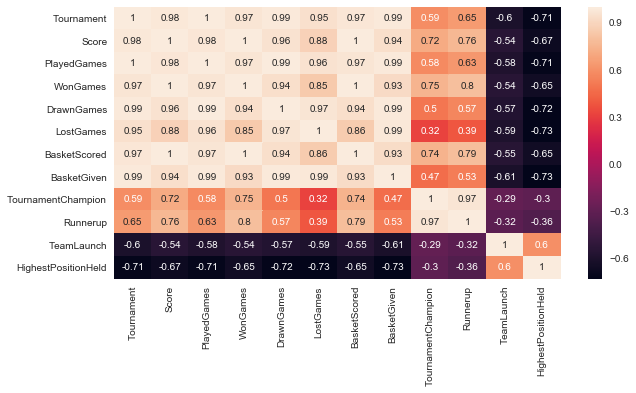

In [49]:
# correlation - using heat map
plt.figure(figsize= (10,5))
sns.heatmap(mydata.corr(), annot=True);
plt.show();

Observations:

Tournament and PlayedGames correlation value is 1. so its a perfect positive correlation.

Score, WonGames, BasketScored correlation value is 1. so its a perfect positive correlation between these fields.

Other than TeamLaunch and HighestPositionHeld remaining all fields are positively correlated.

PlayedGames has storng postivie correlation with WonGames (0.97), DrawnGames (0.99) & LostGames (0.96) → which means most of the games are Drawn compared to win/lost.

PlayedGames has storng postivie correlation with Score (0.98),BasketScored (0.97), BasketGiven (0.99) as well.

As per the heat map or correlation data → we can conclude that the dataset is Highly Correlated.

- Tournment Details across teams 

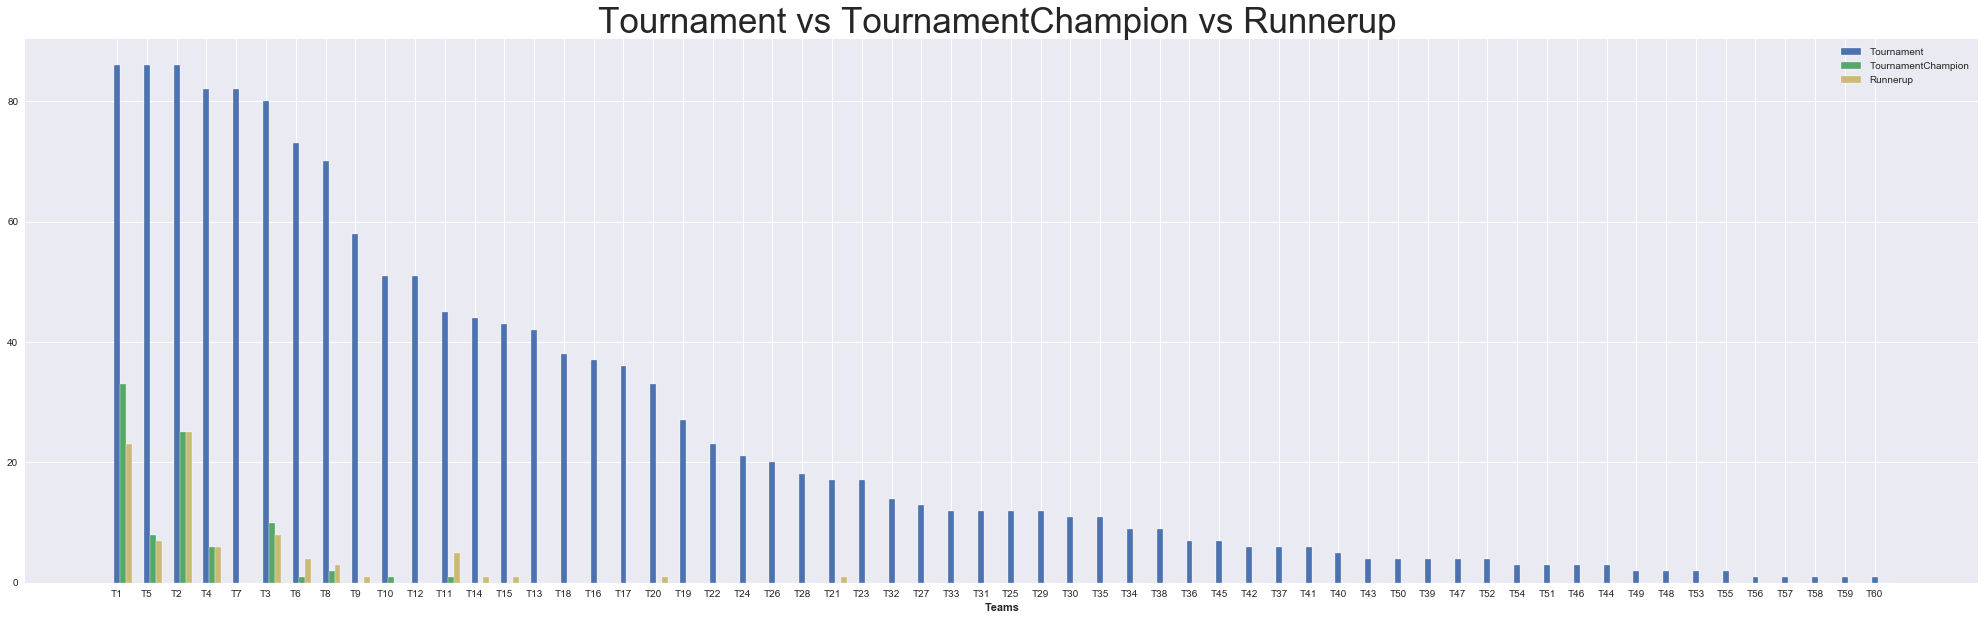

In [50]:
SortedDf=mydata.sort_values('Tournament',ascending=False);
  
  
plt.figure(figsize=(35,10))
# set height of bar
bars1 = SortedDf.Tournament
bars2 = SortedDf.TournamentChampion
bars3 = SortedDf.Runnerup
 # set width of bar
barWidth =  0.2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plotax
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Tournament')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='TournamentChampion')
plt.bar(r3, bars3, color='y', width=barWidth, edgecolor='white', label='Runnerup')

# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("Tournament vs TournamentChampion vs Runnerup ",size=35);
# Create legend & Show graphic
plt.legend()
plt.show()


We observe that T1 to T8 teams participated in more tournments . 

Eventhough T7 played many tournment it did nt come first 2 places any time.

T1 ,T2 and T5 played same number of tournaments but results are good as T1 >T2>T5

T11 appered for less tournments but it showed good results compared to few other teams.

T20, and T21 are participated in less torenments but they stood in second places in few tournments.

There are many teams played in tournments but didnt come in first two places.

In [51]:
# Team(s) that played lowest tournaments
mydata[mydata.Tournament== mydata.Tournament.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
55,T56,1,35,38,8,11,19,36,55,0,0,2016,17
56,T57,1,34,38,8,10,20,38,66,0,0,2009,20
57,T58,1,22,30,7,8,15,37,57,0,0,1956,16
58,T59,1,19,30,7,5,18,51,85,0,0,1951,16
59,T60,1,14,30,5,4,21,34,65,0,0,1955,15


In [52]:
# Team(s) that played highest tournaments
mydata[mydata.Tournament==mydata.Tournament.max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,T2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
4,T5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [53]:
# Team(s) that have lowest score
mydata[mydata.Score == mydata.Score.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
59,T60,1,14,30,5,4,21,34,65,0,0,1955,15


In [54]:
# Team(s) that have highest score
mydata[mydata.Score == mydata.Score.max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1


In [55]:
# Team(s) that played more games
mydata[mydata.PlayedGames == mydata.PlayedGames.max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,T2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
4,T5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [56]:
# Team(s) that played less games
mydata[mydata.PlayedGames == mydata.PlayedGames.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
57,T58,1,22,30,7,8,15,37,57,0,0,1956,16
58,T59,1,19,30,7,5,18,51,85,0,0,1951,16
59,T60,1,14,30,5,4,21,34,65,0,0,1955,15


In [57]:
# team(s) that won most games
mydata[mydata.WonGames == mydata.WonGames.max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1


In [58]:
# team(s) that won ,least games
mydata[mydata.WonGames == mydata.WonGames.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
59,T60,1,14,30,5,4,21,34,65,0,0,1955,15


In [59]:
# team(s) that draw most games
mydata[mydata.DrawnGames == mydata.DrawnGames.max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
4,T5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [60]:
# team(s) that draw least games
mydata[mydata.DrawnGames == mydata.DrawnGames.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
59,T60,1,14,30,5,4,21,34,65,0,0,1955,15


In [61]:
# team(s) that draw most games
mydata[mydata.LostGames == mydata.LostGames.max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
6,T7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3


In [62]:
# team(s) that draw least games
mydata[mydata.LostGames == mydata.LostGames.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
57,T58,1,22,30,7,8,15,37,57,0,0,1956,16


In [63]:
# earliest launched teams
mydata[mydata.TeamLaunch == mydata.TeamLaunch.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,T2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,T3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
4,T5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
6,T7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,T8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
13,T14,44,1416,1428,453,336,639,1843,2368,0,1,1929,2
44,T45,7,107,130,43,21,66,227,308,0,0,1929,3
51,T52,4,56,72,21,14,37,153,184,0,0,1929,6
53,T54,3,42,54,18,6,30,97,131,0,0,1929,8


In [64]:
# latest launched team(s)
mydata[mydata.TeamLaunch == mydata.TeamLaunch.max()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
55,T56,1,35,38,8,11,19,36,55,0,0,2016,17


In [65]:
# Team(s) that hold highest position
highest_position_teams = np.array(mydata[mydata.HighestPositionHeld == mydata.HighestPositionHeld.max()].Team)
highest_position_teams

array(['T57'], dtype=object)

In [66]:
# Team(s) that hold lowest position
mydata[mydata.HighestPositionHeld == mydata.HighestPositionHeld.min()]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,T2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,T3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,T4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,T5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,T6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
7,T8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
9,T10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1
10,T11,45,1814,1530,563,392,575,2052,2188,1,5,1941,1


Observations:

Teams → T1, T2, T5 → played more number of tournaments (86) & games (2762) than any other teams.

T1, T2, T5 → launched in the same year (1929)
Teams → T5, T7, T8, T14, T45, T52, T54 → first launched or oldest teams.

Teams → T56, T57, T58, T59, T60 → played only one tournament so far.

Teams T58, T59, T60 → pretty much older, we don't know wether these teams are still active or not. (incomplete data to make any further assumptions). Also, they played lowest number of games (30).
Team T56 → recently launched team or youngest team.

Team T1 has highest → Score, WonGames
Team T60 has lowest → Score, WonGames, DrawnGames
Team T5 → most DrawnGames
Team T7 has more LostGames

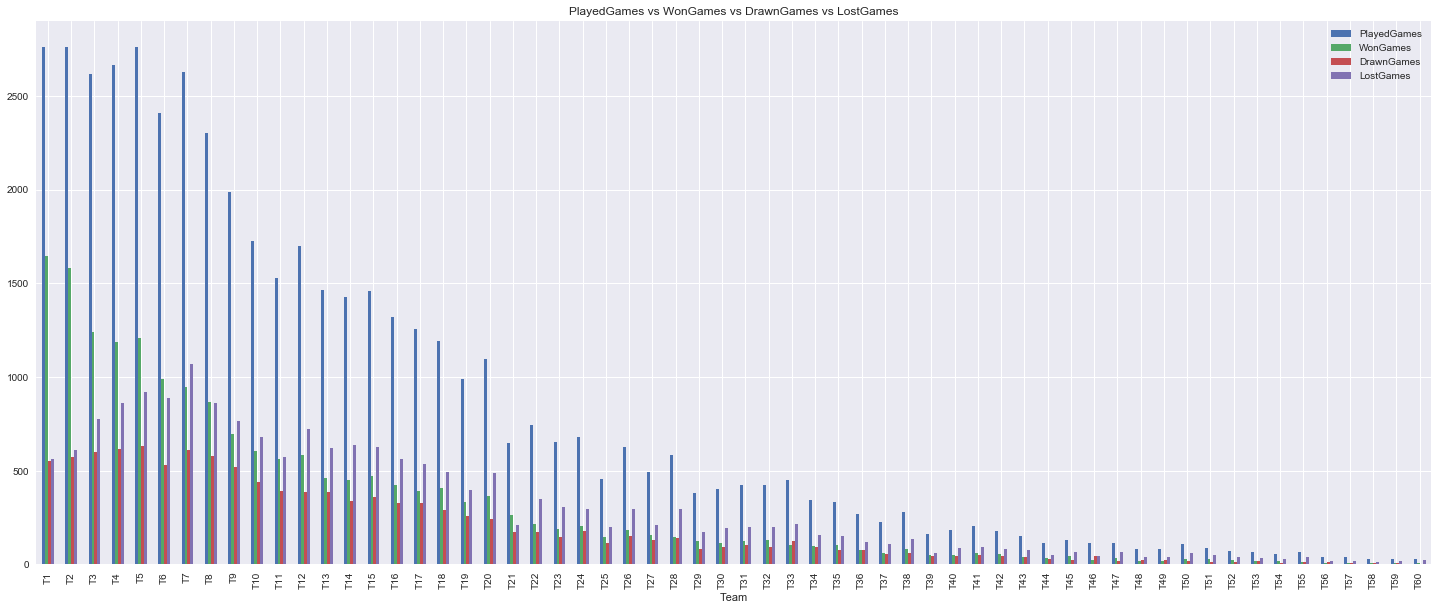

In [67]:
# bar plot - PlayedGames vs WonGames vs DrawnGames vs LostGames

mydata.plot(x='Team', y= ['PlayedGames' ,'WonGames','DrawnGames', 'LostGames'],
                      title= 'PlayedGames vs WonGames vs DrawnGames vs LostGames',
                      kind= 'bar',figsize= (25,10));

As Tournment Chamion and Won games has perfect poistive correlation, all the observation from Tournment graphs are same withPlayed Games .

Team3 showing best retults after T1,T2. 

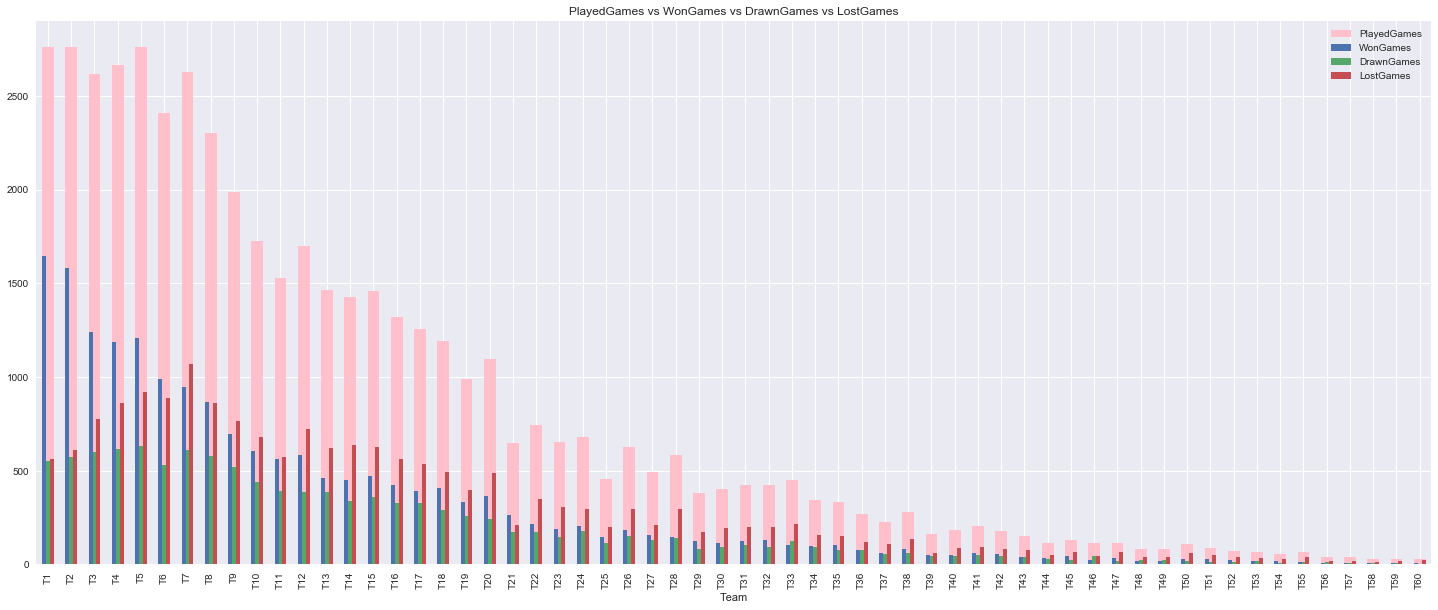

In [68]:
# plotting  - PlayedGames vs WonGames vs DrawnGames vs LostGames (way-2)

ax = mydata.plot(x='Team', y='PlayedGames', kind='bar', figsize= (25,10),color= 'pink');

mydata.plot(x='Team',y= ['WonGames','DrawnGames', 'LostGames'],
                      ax=ax,
                      title= 'PlayedGames vs WonGames vs DrawnGames vs LostGames',
                      kind= 'bar',figsize= (25,10));

Observations:

As we can see the observations from graph 1 (Tournament vs TournamentChampion vs RunnerUp) are same for this new graph 2 as well.

This is because we know that Tournament & PlayedGames has perfect correlation. (check the correlation observations for reference).

Team T7 → has more number of LostGames.

Team T1, T2, T3 → Top performing teams.

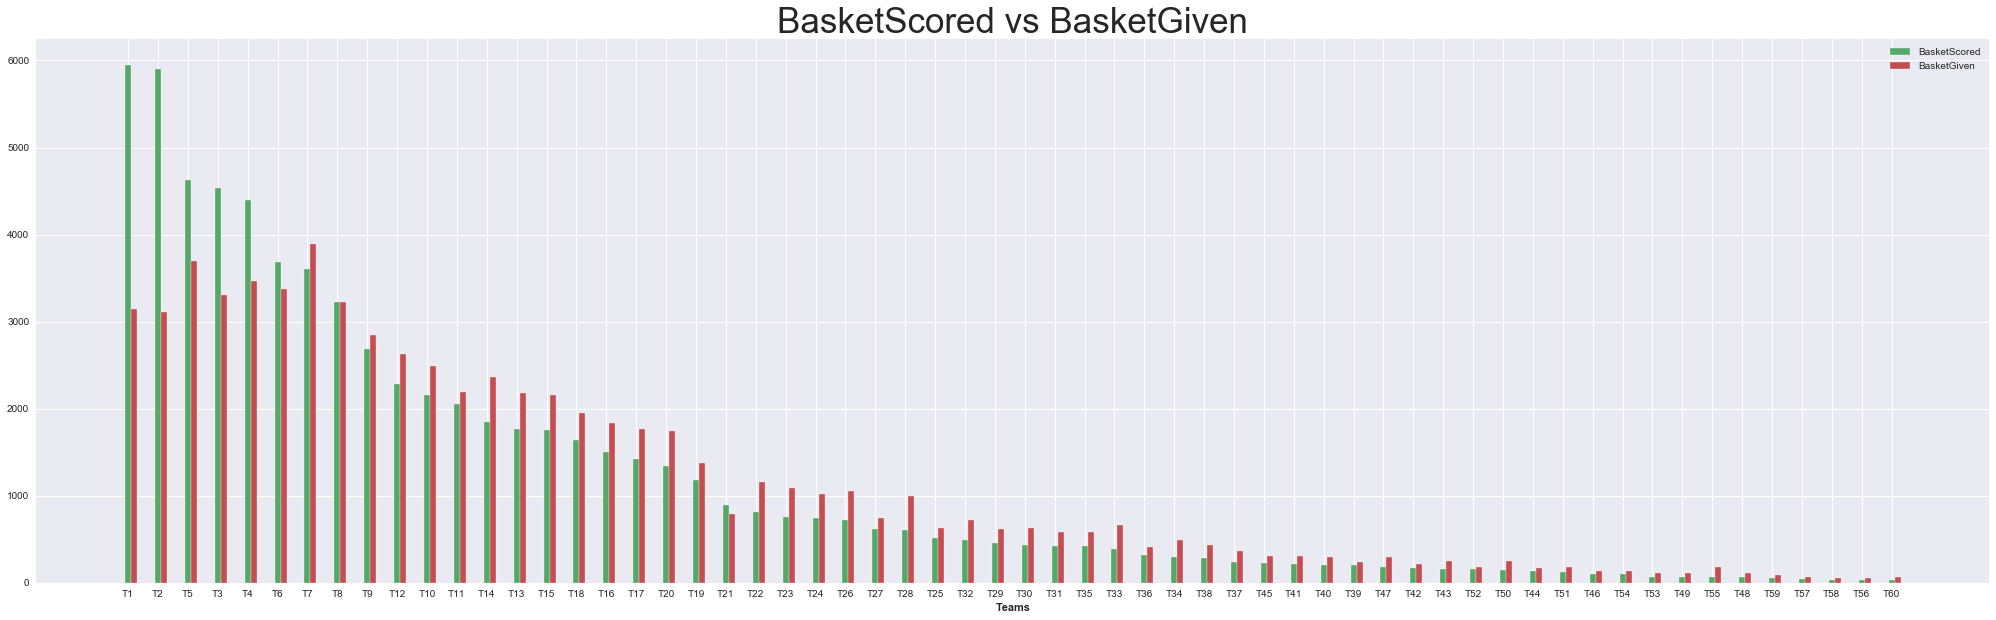

In [69]:
SortedDf=mydata.sort_values('BasketScored',ascending=False);
  
plt.figure(figsize=(35,10))
# set height of bar
bars1 = SortedDf.BasketScored
bars2 = SortedDf.BasketGiven

 # set width of bar
barWidth =  0.2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plotax
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='BasketScored')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='BasketGiven')

# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("BasketScored vs BasketGiven",size=35)
# Create legend & Show graphic
plt.legend()
plt.show()


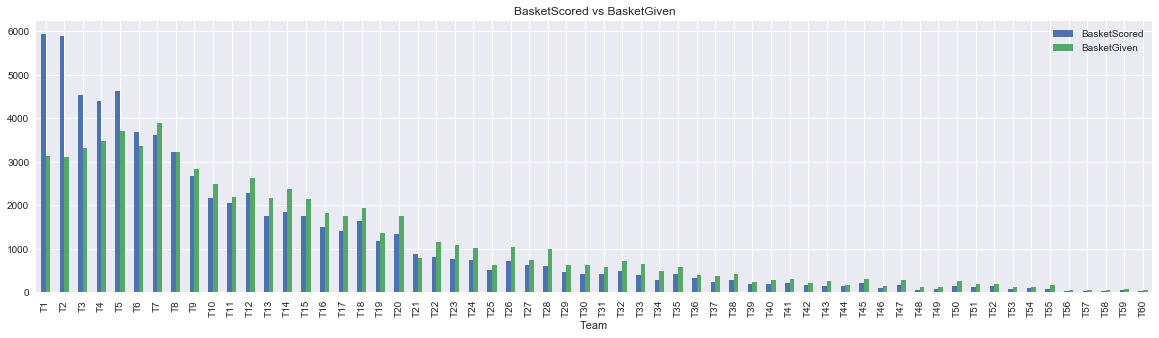

In [70]:
# otherway #bar plot - BasketScored vs BasketGiven
mydata.plot(x='Team', y=['BasketScored', 'BasketGiven'], 
                      title = 'BasketScored vs BasketGiven',
                      kind= 'bar',figsize= (20,5));

Observations:
- Most of the teams BaskedGiven > Baskets scored.
- Only T1,T2,T5,T3,T4,T6, T21 has more baskets scored compared to Baskets given. T8 has equal proportion
- Teams T1, T2, T3, T4, T5, T6, T21 → BasketScored > BasketGiven
- Team T8 → has nearly equal number of BasketScored & BasketGiven.
- All remaining Teams → BasketScored < BasketGiven.

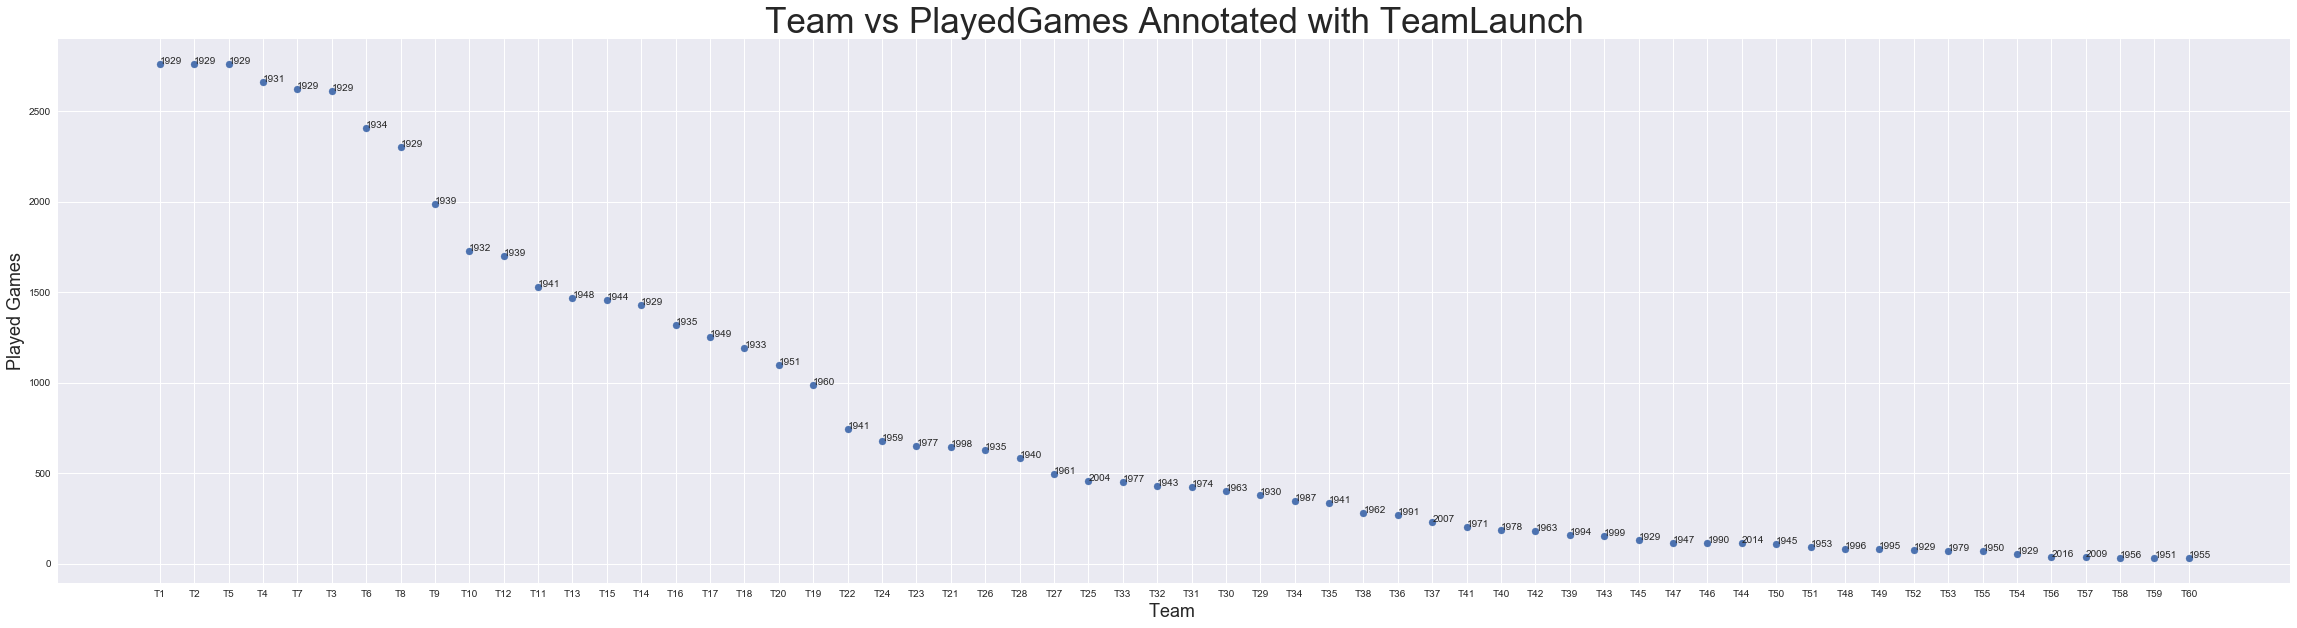

In [71]:
#Bivariate Analysis
SortedDf=mydata.sort_values('PlayedGames',ascending=False);
fig, ax = plt.subplots(figsize=(40,10))   # setting the figure size of the plot
ax.scatter(SortedDf['Team'], SortedDf['PlayedGames'])  # scatter plot
ax.set_xlabel('Team ', fontsize=18)
ax.set_ylabel('Played Games', fontsize=18)

team=np.array(SortedDf.Team);
basket=np.array(SortedDf.PlayedGames);
for i, txt in enumerate(SortedDf.TeamLaunch):
    plt.annotate(txt, (team[i], basket[i]))
plt.title("Team vs PlayedGames Annotated with TeamLaunch",size=35);
plt.show()

There are old teams who played very less games T52 ,T54. 

T25 ,T37, T44 are quite new teams but they participated in good amount of games compared to few old teams.

T21 is the team is from 1998 year but good number of games played and it is almost at midian of the dtaa points. 

In [72]:
# std for basket_ball_data
mydata.std()

Tournament               26.884620
Score                  1138.342899
PlayedGames             877.465393
WonGames                408.481395
DrawnGames              201.985508
LostGames               294.508639
BasketScored           1512.063948
BasketGiven            1163.946914
TournamentChampion        5.515540
Runnerup                  4.574679
TeamLaunch               26.646732
HighestPositionHeld       5.315232
dtype: float64

In [73]:
# covariance for the basket_ball_data
mydata.cov()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
Tournament,722.782768,3.003033e+04,2.355925e+04,10671.614124,5372.170904,7516.715537,3.962956e+04,3.090991e+04,87.383898,79.441243,-429.234746,-101.172034
Score,30030.333051,1.295825e+06,9.785666e+05,463704.696610,220292.385593,294612.626271,1.715454e+06,1.250509e+06,4489.268644,3982.835593,-16335.672034,-4049.124576
PlayedGames,23559.249153,9.785666e+05,7.699455e+05,346774.216949,176166.940678,247031.154237,1.286941e+06,1.011131e+06,2783.174576,2541.345763,-13590.384746,-3316.361017
WonGames,10671.614124,4.637047e+05,3.467742e+05,166857.049718,77508.658192,102428.853672,6.172252e+05,4.401460e+05,1696.289831,1490.917514,-5882.320339,-1406.527119
DrawnGames,5372.170904,2.202924e+05,1.761669e+05,77508.658192,40798.145480,57867.608757,2.877725e+05,2.333322e+05,560.792373,523.014124,-3068.826271,-773.258475
LostGames,7516.715537,2.946126e+05,2.470312e+05,102428.853672,57867.608757,86735.338701,3.820110e+05,3.376645e+05,526.338136,527.657062,-4642.466949,-1136.736441
BasketScored,39629.558475,1.715454e+06,1.286941e+06,617225.191525,287772.461864,382010.997458,2.286337e+06,1.638664e+06,6203.568644,5471.794915,-22166.405932,-5213.356780
BasketGiven,30909.909040,1.250509e+06,1.011131e+06,440145.958192,233332.166667,337664.535028,1.638664e+06,1.354772e+06,3027.689831,2840.439548,-18885.327119,-4499.689831
TournamentChampion,87.383898,4.489269e+03,2.783175e+03,1696.289831,560.792373,526.338136,6.203569e+03,3.027690e+03,30.421186,24.513559,-42.146610,-8.921186
Runnerup,79.441243,3.982836e+03,2.541346e+03,1490.917514,523.014124,527.657062,5.471795e+03,2.840440e+03,24.513559,20.927684,-38.672881,-8.733898


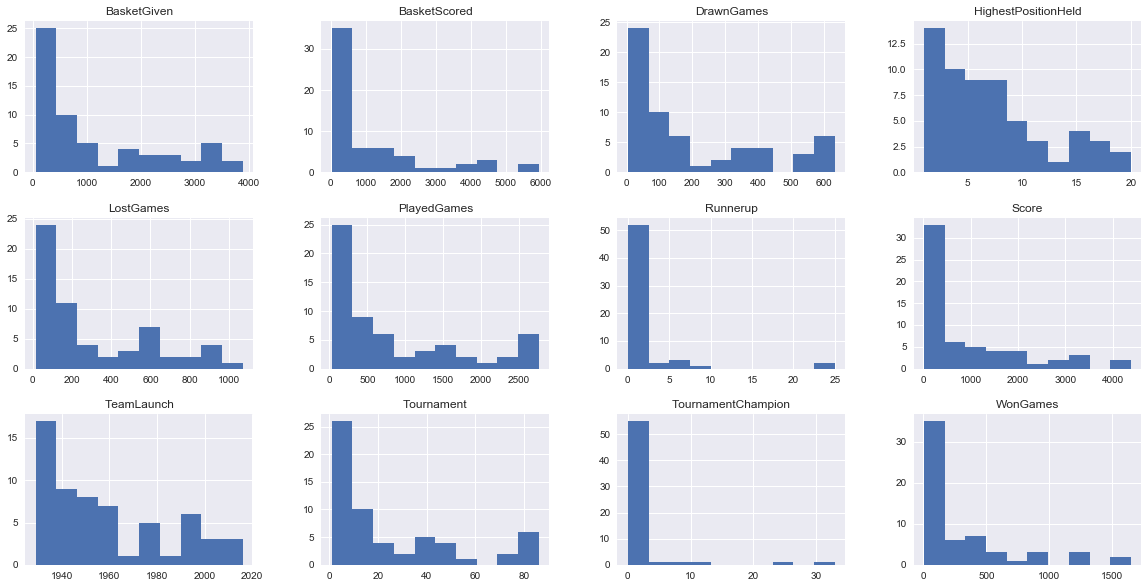

In [74]:
# Historgram Distribution for each columns in basket_ball_data
columns = mydata.columns.drop('Team')
mydata[columns].hist(stacked=False, figsize=(20,10), layout=(3,4));

Additional Features
For the sake of better understanding, let's derive following features from some of the existing ones.

CancelledGames: Number of Games played but no result have been declared. These are the games could have cancelled or withdrawn without declaring any result such as won/lost/drawn.

WinningPercentage: Percentages of games owned by the team.

LoosingPercentage: Percentages of games lost by the team.

WinningRatio: Ratio of games won to that of lost

BasketRatio: Ratio of baskets scored to that of given

In [75]:
# Add CancelledGames features
# mydata.drop('CancelledGames', axis=1, inplace=True)
n_cancelled = mydata['PlayedGames'] - (mydata['DrawnGames'] + mydata['WonGames'] + mydata['LostGames'])
mydata.insert(loc=7, column='CancelledGames', value=n_cancelled)
mydata.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,552,563,0,5947,3140,33,23,1929,1
1,T2,86,4262,2762,1581,573,608,0,5900,3114,25,25,1929,1
2,T3,80,3442,2614,1241,598,775,0,4534,3309,10,8,1929,1
3,T4,82,3386,2664,1187,616,861,0,4398,3469,6,6,1931,1
4,T5,86,3368,2762,1209,633,920,0,4631,3700,8,7,1929,1


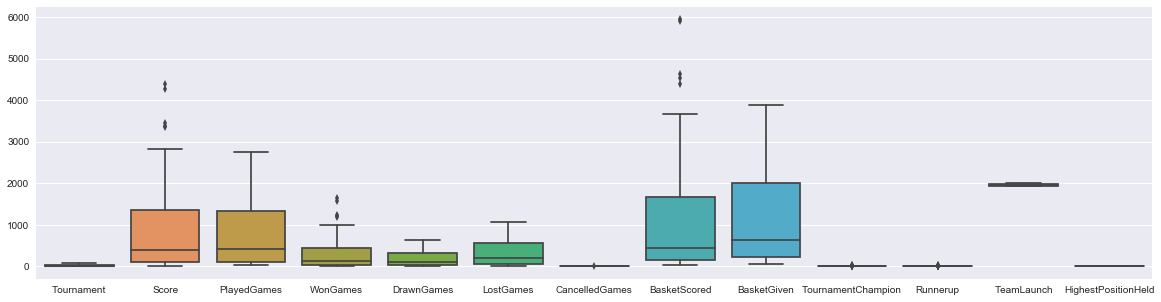

In [76]:
# Box-plot for basket_ball_data
plt.figure(figsize= (20,5))
sns.boxplot(data= mydata);

In [77]:
# Add WinningPercentage features
# basketbcall.drop('WinningPercentage', axis=1, inplace=True)
won_pct = mydata['WonGames'] / mydata['PlayedGames']
mydata.insert(loc=5, column='WinningPercentage', value=won_pct)
mydata.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,T1,86,4385,2762,1647,0.596307,552,563,0,5947,3140,33,23,1929,1
1,T2,86,4262,2762,1581,0.572411,573,608,0,5900,3114,25,25,1929,1
2,T3,80,3442,2614,1241,0.474751,598,775,0,4534,3309,10,8,1929,1
3,T4,82,3386,2664,1187,0.445571,616,861,0,4398,3469,6,6,1931,1
4,T5,86,3368,2762,1209,0.437726,633,920,0,4631,3700,8,7,1929,1


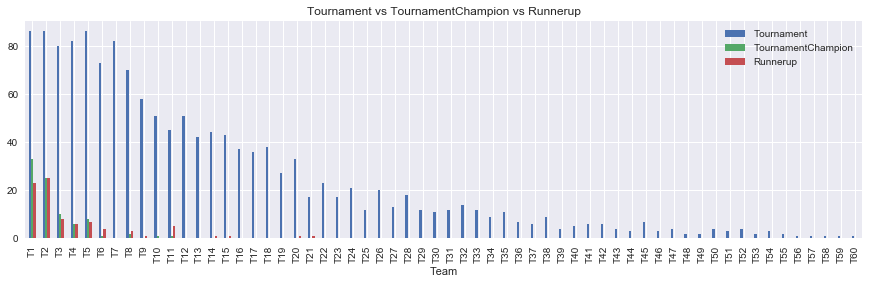

In [78]:
# bar plot - Tournament vs TournamentChampion vs RunnerUp
mydata.plot(x='Team', y= ['Tournament','TournamentChampion', 'Runnerup'],
                      title= 'Tournament vs TournamentChampion vs Runnerup',
                      kind= 'bar',figsize= (15,4));

Observations:

Teams T1, T2, T5 → played same number of tournaments. Results are T1 > T2 > T5.

Team T2 → has same number of TournamentChampion & RunnerUp.

Team T4 → has same number of TournamentChampion & RunnerUp.

Team T7 → eventhough, it played more tournaments, it did not come champion or runner up anytime.

Team T11 → participated in less tournaments but showed good results.

Most of the teams played in the tournamnets but didn't come in first or second.

In [79]:
# Calculate the winning percentage of the team from PlayedGames	and WonGames and adding extra column to the dataframe
mydata['WinningPercentage'] = mydata['WonGames']/mydata['PlayedGames']
mydata['WinningPercentage'].dtype
TopWin = mydata['WinningPercentage'].sort_values(ascending =False).head(10)
print('The top 5 teams, which won the maximum games are')
mydata.groupby(['Team'])['WinningPercentage'].sum().sort_values(ascending =False).head(5)

The top 5 teams, which won the maximum games are


Team
T1    0.596307
T2    0.572411
T3    0.474751
T4    0.445571
T5    0.437726
Name: WinningPercentage, dtype: float64

In [80]:
# Calculate the percentage of getting championship against tounament played
mydata['Champions'] = mydata['TournamentChampion']/mydata['Tournament']
mydata['Champions'].dtype
TopChampions = mydata['Champions'].sort_values(ascending =False).head(10)
print('The top 5 teams which became Champions are:')
mydata.groupby(['Team'])['Champions'].sum().sort_values(ascending =False).head(5)

The top 5 teams which became Champions are:


Team
T1    0.383721
T2    0.290698
T3    0.125000
T5    0.093023
T4    0.073171
Name: Champions, dtype: float64

In [81]:
# Add LoosingPercentage features
# mydata.drop('LoosingPercentage', axis=1, inplace=True)
won_pct = mydata['LostGames'] / mydata['PlayedGames']
mydata.insert(loc=8, column='LoosingPercentage', value=won_pct)
mydata.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld,Champions
0,T1,86,4385,2762,1647,0.596307,552,563,0.203838,0,5947,3140,33,23,1929,1,0.383721
1,T2,86,4262,2762,1581,0.572411,573,608,0.220130,0,5900,3114,25,25,1929,1,0.290698
2,T3,80,3442,2614,1241,0.474751,598,775,0.296480,0,4534,3309,10,8,1929,1,0.125000
3,T4,82,3386,2664,1187,0.445571,616,861,0.323198,0,4398,3469,6,6,1931,1,0.073171
4,T5,86,3368,2762,1209,0.437726,633,920,0.333092,0,4631,3700,8,7,1929,1,0.093023


In [82]:
# Add WinningRatio features
# mydata.drop('WinningRatio', axis=1, inplace=True)
won_pct = mydata['WonGames'] / mydata['LostGames']
mydata.insert(loc=9, column='WinningRatio', value=won_pct)
mydata.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld,Champions
0,T1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,33,23,1929,1,0.383721
1,T2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,25,25,1929,1,0.290698
2,T3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,10,8,1929,1,0.125000
3,T4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,6,6,1931,1,0.073171
4,T5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,8,7,1929,1,0.093023


In [83]:
# Add BasketRatio features
# mydata.drop('BasketRatio', axis=1, inplace=True)
won_pct = mydata['BasketScored'] / mydata['BasketGiven']
mydata.insert(loc=13, column='BasketRatio', value=won_pct)
mydata.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,BasketRatio,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld,Champions
0,T1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,1.893949,33,23,1929,1,0.383721
1,T2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,1.894669,25,25,1929,1,0.290698
2,T3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,1.370202,10,8,1929,1,0.125000
3,T4,82,3386,2664,1187,0.445571,616,861,0.323198,1.378630,0,4398,3469,1.267801,6,6,1931,1,0.073171
4,T5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,1.251622,8,7,1929,1,0.093023


In [84]:
# Getting the teams those who played maximum number of Tournament
mydata.groupby(['Team'])['Tournament'].sum().sort_values(ascending=False).head(5)

Team
T1    86
T5    86
T2    86
T7    82
T4    82
Name: Tournament, dtype: int64

In [85]:
# Getting the teams those who played minimum number of Tournament
mydata.groupby(['Team'])['Tournament'].sum().sort_values(ascending=True).head(5)

Team
T60    1
T58    1
T57    1
T56    1
T59    1
Name: Tournament, dtype: int64

In [86]:
# Calculate the total period, the team is playing the tournament assuming the teams included upto 2020

# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
  
# fetching the current year, month and day of today
print("Current year:", todays_date.year)

mydata['TeamAge'] = todays_date.year - mydata['TeamLaunch']
print('The oldest team in the tournament is of age: ',mydata['TeamAge'].max())
print('The oldest team in the tournament are: ')
mydata[mydata['TeamAge'] == mydata['TeamAge'].max()]

Current year: 2022
The oldest team in the tournament is of age:  93
The oldest team in the tournament are: 


,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,BasketRatio,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld,Champions,TeamAge
0,T1,86,4385,2762,1647,0.596307,552,563,0.203838,2.925400,0,5947,3140,1.893949,33,23,1929,1,0.383721,93
1,T2,86,4262,2762,1581,0.572411,573,608,0.220130,2.600329,0,5900,3114,1.894669,25,25,1929,1,0.290698,93
2,T3,80,3442,2614,1241,0.474751,598,775,0.296480,1.601290,0,4534,3309,1.370202,10,8,1929,1,0.125000,93
4,T5,86,3368,2762,1209,0.437726,633,920,0.333092,1.314130,0,4631,3700,1.251622,8,7,1929,1,0.093023,93
6,T7,82,2792,2626,948,0.361005,608,1070,0.407464,0.885981,0,3609,3889,0.928002,0,0,1929,3,0.000000,93
7,T8,70,2573,2302,864,0.375326,577,861,0.374023,1.003484,0,3228,3230,0.999381,2,3,1929,1,0.028571,93
13,T14,44,1416,1428,453,0.317227,336,639,0.447479,0.708920,0,1843,2368,0.778294,0,1,1929,2,0.000000,93
44,T45,7,107,130,43,0.330769,21,66,0.507692,0.651515,0,227,308,0.737013,0,0,1929,3,0.000000,93
51,T52,4,56,72,21,0.291667,14,37,0.513889,0.567568,0,153,184,0.831522,0,0,1929,6,0.000000,93
53,T54,3,42,54,18,0.333333,6,30,0.555556,0.600000,0,97,131,0.740458,0,0,1929,8,0.000000,93


In [87]:
print('The newest team in the tournament is of age: ',mydata['TeamAge'].min())
print('The newest team in the tournament are: ')
mydata[mydata['TeamAge'] == mydata['TeamAge'].min()]

The newest team in the tournament is of age:  6
The newest team in the tournament are: 


,Team,Tournament,Score,PlayedGames,WonGames,WinningPercentage,DrawnGames,LostGames,LoosingPercentage,WinningRatio,CancelledGames,BasketScored,BasketGiven,BasketRatio,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld,Champions,TeamAge
55,T56,1,35,38,8,0.210526,11,19,0.5,0.421053,0,36,55,0.654545,0,0,2016,17,0.0,6


In [88]:
# Getting the teams those who played maximum number of Tournament against the age of the team
mydata['TeamExperience'] = mydata['TeamAge']/mydata['Tournament']
mydata['TeamExperience'].dtype
print('The top 5 teams with maximum experience of Tournament are:')
mydata.groupby(['Team'])['TeamExperience'].sum().sort_values(ascending =False).head(5)

The top 5 teams with maximum experience of Tournament are:


Team
T59    71.0
T60    67.0
T58    66.0
T55    36.0
T54    31.0
Name: TeamExperience, dtype: float64

In [89]:
print('The 5 teams with minimum experience of Tournament are:')
mydata.groupby(['Team'])['TeamExperience'].sum().sort_values(ascending =True).head(5)

The 5 teams with minimum experience of Tournament are:


Team
T1    1.081395
T5    1.081395
T2    1.081395
T4    1.109756
T7    1.134146
Name: TeamExperience, dtype: float64

In [90]:
# Calculate the percentage of getting championship against experience
mydata['TeamPerformance'] = mydata['Champions']/mydata['TeamExperience']
mydata['TeamPerformance'].dtype
print('The top 5 teams with the percentage of getting championship against experience are:')
mydata.groupby(['Team'])['TeamPerformance'].sum().sort_values(ascending =False).head(5)

The top 5 teams with the percentage of getting championship against experience are:


Team
T1    0.354839
T2    0.268817
T3    0.107527
T5    0.086022
T4    0.065934
Name: TeamPerformance, dtype: float64

In [91]:
# Lets Filter the dataframe to understand age of the team, WinningPercentage, Champions,Team Experience and Team Performance
df_1=mydata.filter(items=['Team', 'TeamAge', 'TeamExperience','TeamPerformance','WinningPercentage','Champions']) 
df_1

,Team,TeamAge,TeamExperience,TeamPerformance,WinningPercentage,Champions
0,T1,93,1.081395,0.354839,0.596307,0.383721
1,T2,93,1.081395,0.268817,0.572411,0.290698
2,T3,93,1.162500,0.107527,0.474751,0.125000
3,T4,91,1.109756,0.065934,0.445571,0.073171
4,T5,93,1.081395,0.086022,0.437726,0.093023
5,T6,88,1.205479,0.011364,0.411130,0.013699
6,T7,93,1.134146,0.000000,0.361005,0.000000
7,T8,93,1.328571,0.021505,0.375326,0.028571
8,T9,83,1.431034,0.000000,0.351460,0.000000
9,T10,90,1.764706,0.011111,0.350694,0.019608


- Data Visualization
- Exploratory Data Analysis(EDA) is incomplete without Data Visualization. It's a pictorial representation of data using beautiful graphs. It enables us to see analytics presented visually which helps in grasping unnoticed information or identify new patterns.

### Univariate Analysis

In [92]:
mydata.skew()

Tournament             1.197176
Score                  1.574104
PlayedGames            1.123454
WonGames               1.786067
WinningPercentage      1.440046
DrawnGames             0.984899
LostGames              0.880596
LoosingPercentage     -0.268561
WinningRatio           3.207929
CancelledGames         7.745967
BasketScored           1.758058
BasketGiven            0.958164
BasketRatio            2.406538
TournamentChampion     4.734845
Runnerup               4.321794
TeamLaunch             0.682570
HighestPositionHeld    0.832164
Champions              4.660697
TeamAge               -0.682570
TeamExperience         2.894124
TeamPerformance        4.728205
dtype: float64

- Positively skewed: Most frequent values are low and tail is towards high values.

C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'norm

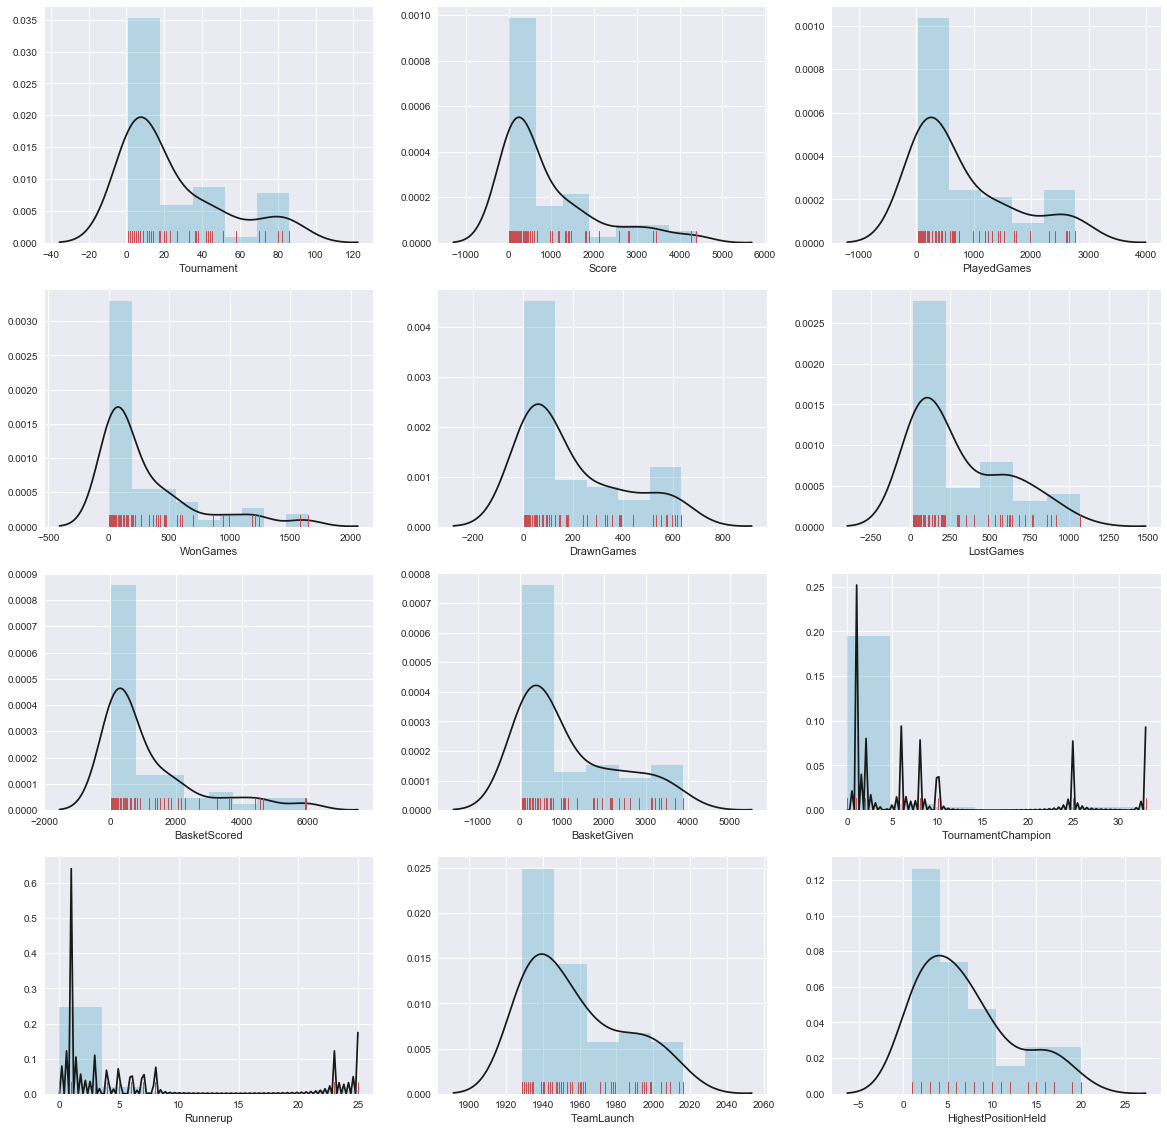

In [93]:
# Check for distribution skewness
attrs = ['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runnerup','TeamLaunch','HighestPositionHeld']
plt.figure(figsize=(20,20))
index = 1
for col in mydata[attrs]:
    plt.subplot(4,3,index)
    sns.distplot(mydata[col], rug=True, kde=True,
                 rug_kws={"color": "r"},
                 kde_kws={"color": "k"},
                 hist_kws={"color": "c"})
    index += 1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

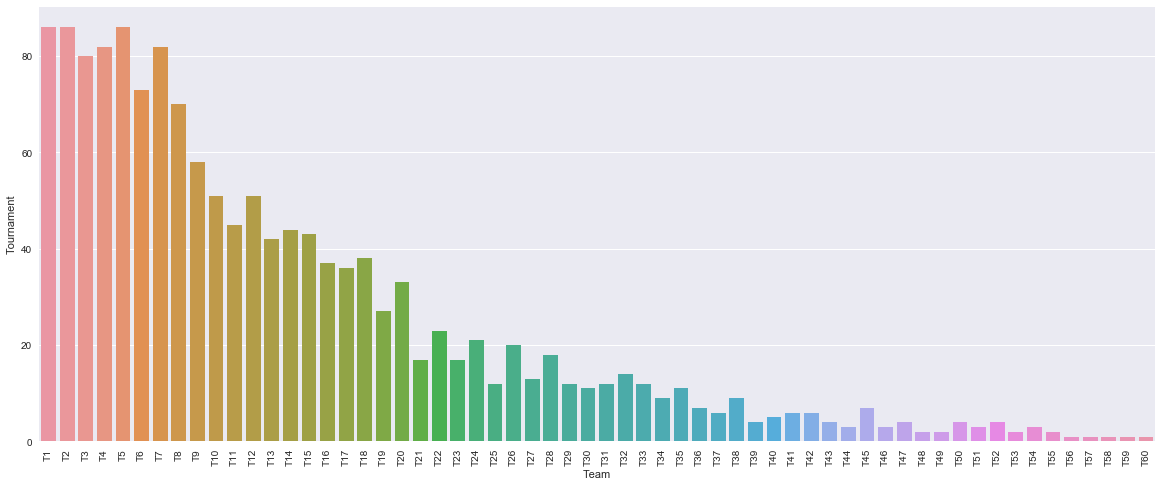

In [94]:
# No of tournaments played by teams
plt.figure(figsize=(20,8))
sns.barplot(mydata['Team'], mydata['Tournament'])
plt.xticks(rotation=90)

Text(0.5,1,'# matches lost')

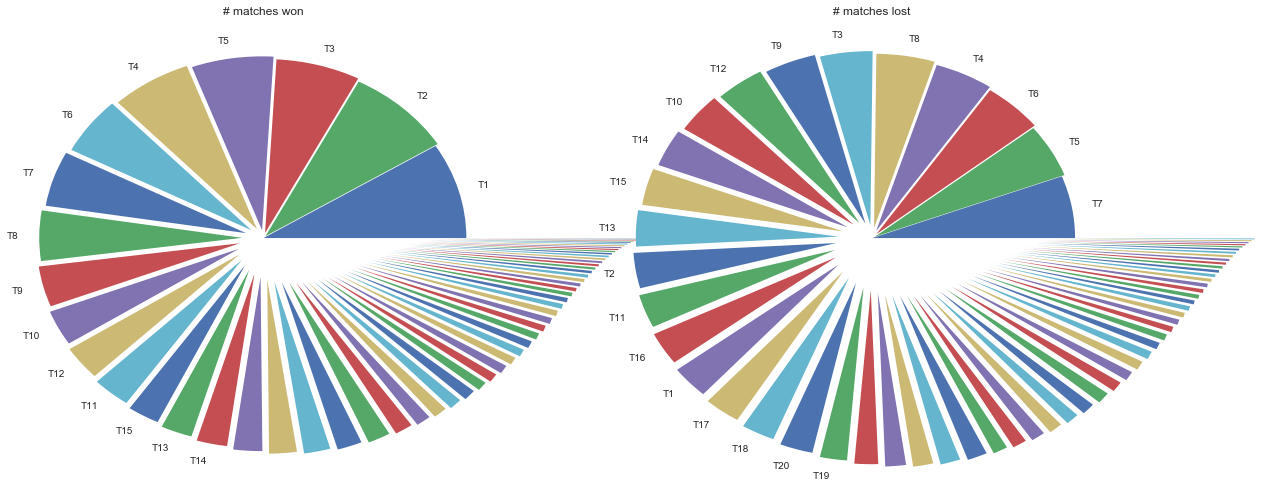

In [95]:
# No of matches won/lost by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = mydata[['Team','WonGames']].sort_values(by="WonGames", ascending=False)
plot = plt.pie(bb['WonGames'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches won')
plt.subplot(1,2,2)
bb = mydata[['Team','LostGames']].sort_values(by="LostGames", ascending=False)
plot = plt.pie(bb['LostGames'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20), explode=[0.015*x for x in range(len(bb))])
plt.title('# matches lost')

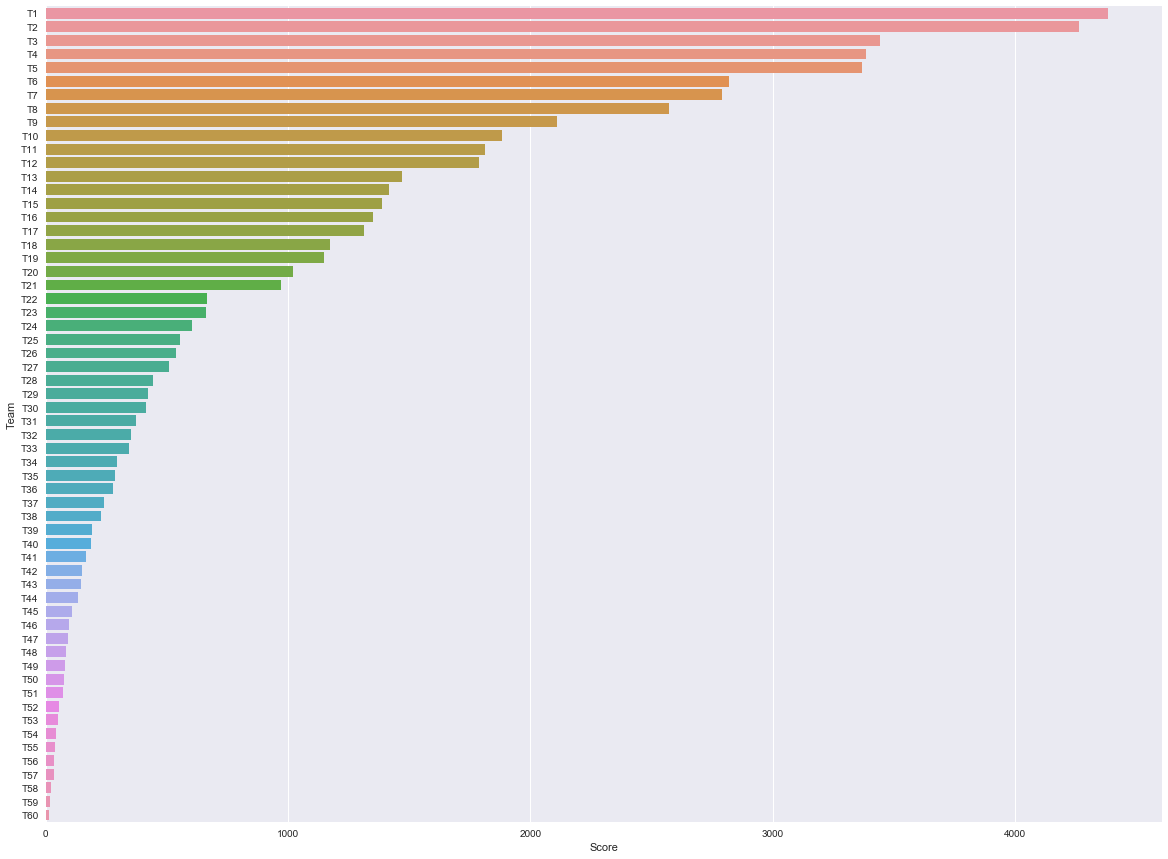

In [96]:
# Scores of the teams
plt.figure(figsize=(20,15))
sns.barplot(mydata['Score'], mydata['Team'], orient='h')

Text(0.5,1,'# Baskets given')

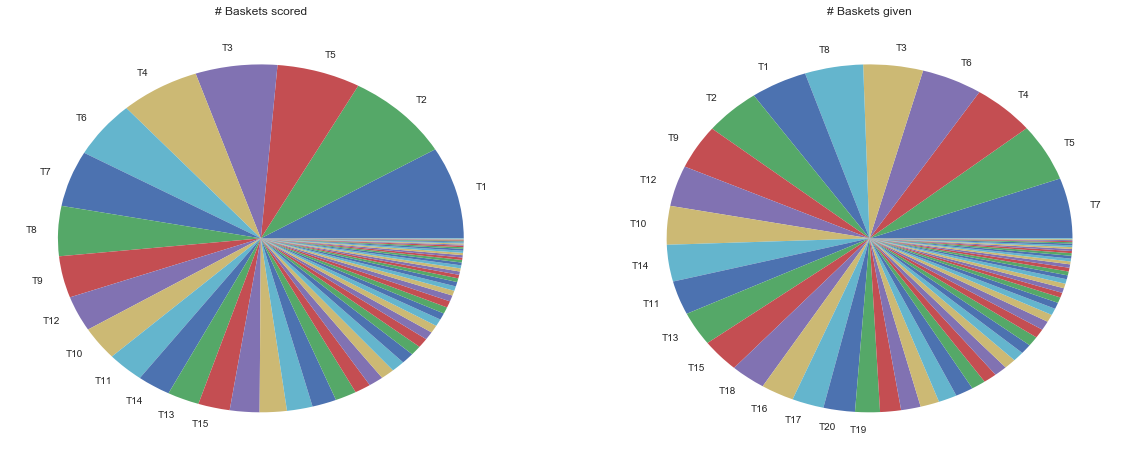

In [97]:
# No of baskets scored/given by teams
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
bb = mydata[['Team','BasketScored']].sort_values(by="BasketScored", ascending=False)
plot = plt.pie(bb['BasketScored'], labels=list(bb['Team'][:15]) + [str()] * (len(bb)-15))
plt.title('# Baskets scored')
plt.subplot(1,2,2)
bb = mydata[['Team','BasketGiven']].sort_values(by="BasketGiven", ascending=False)
plot = plt.pie(bb['BasketGiven'], labels=list(bb['Team'][:20]) + [str()] * (len(bb)-20))
plt.title('# Baskets given')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

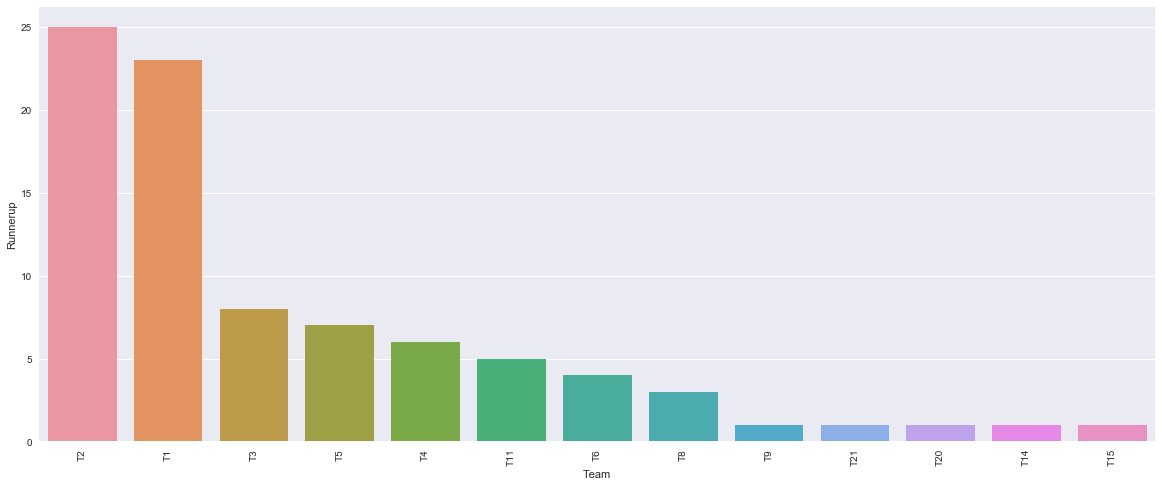

In [98]:
# The most runner-up
plt.figure(figsize=(20,8))
bb = mydata[['Team','Runnerup']].sort_values(by="Runnerup", ascending=False).where(lambda x: x["Runnerup"] > 0)
sns.barplot(bb['Team'], bb['Runnerup'])
plt.xticks(rotation=90)

- Observations

Histograms are a good graphical visualisation of the data by which we have a better understanding of the various features values distribution: for example we can understand what's the average score in teams.

All attributes seems to be slightly right skewed except for TournamentChampion and Runner-up.

Team 1, Team 2 and Team 5 played the most tournament matches but Team 1 and Team 2 happens to be the highest average scorrer.

Team 3 despite of played less matches, have kept their position up in the leaderboard in compared to Team 4 and Team 5
Performance of Team 7 seems to be not very well since they are the ones have lost the most matches played and also have given the most baskets as well.

Team 1 seems to be a team with matured experience and game.

Team 2 also exhibit fine and profound game skills as they are the one appearing the most in the leaderboard as runner-up

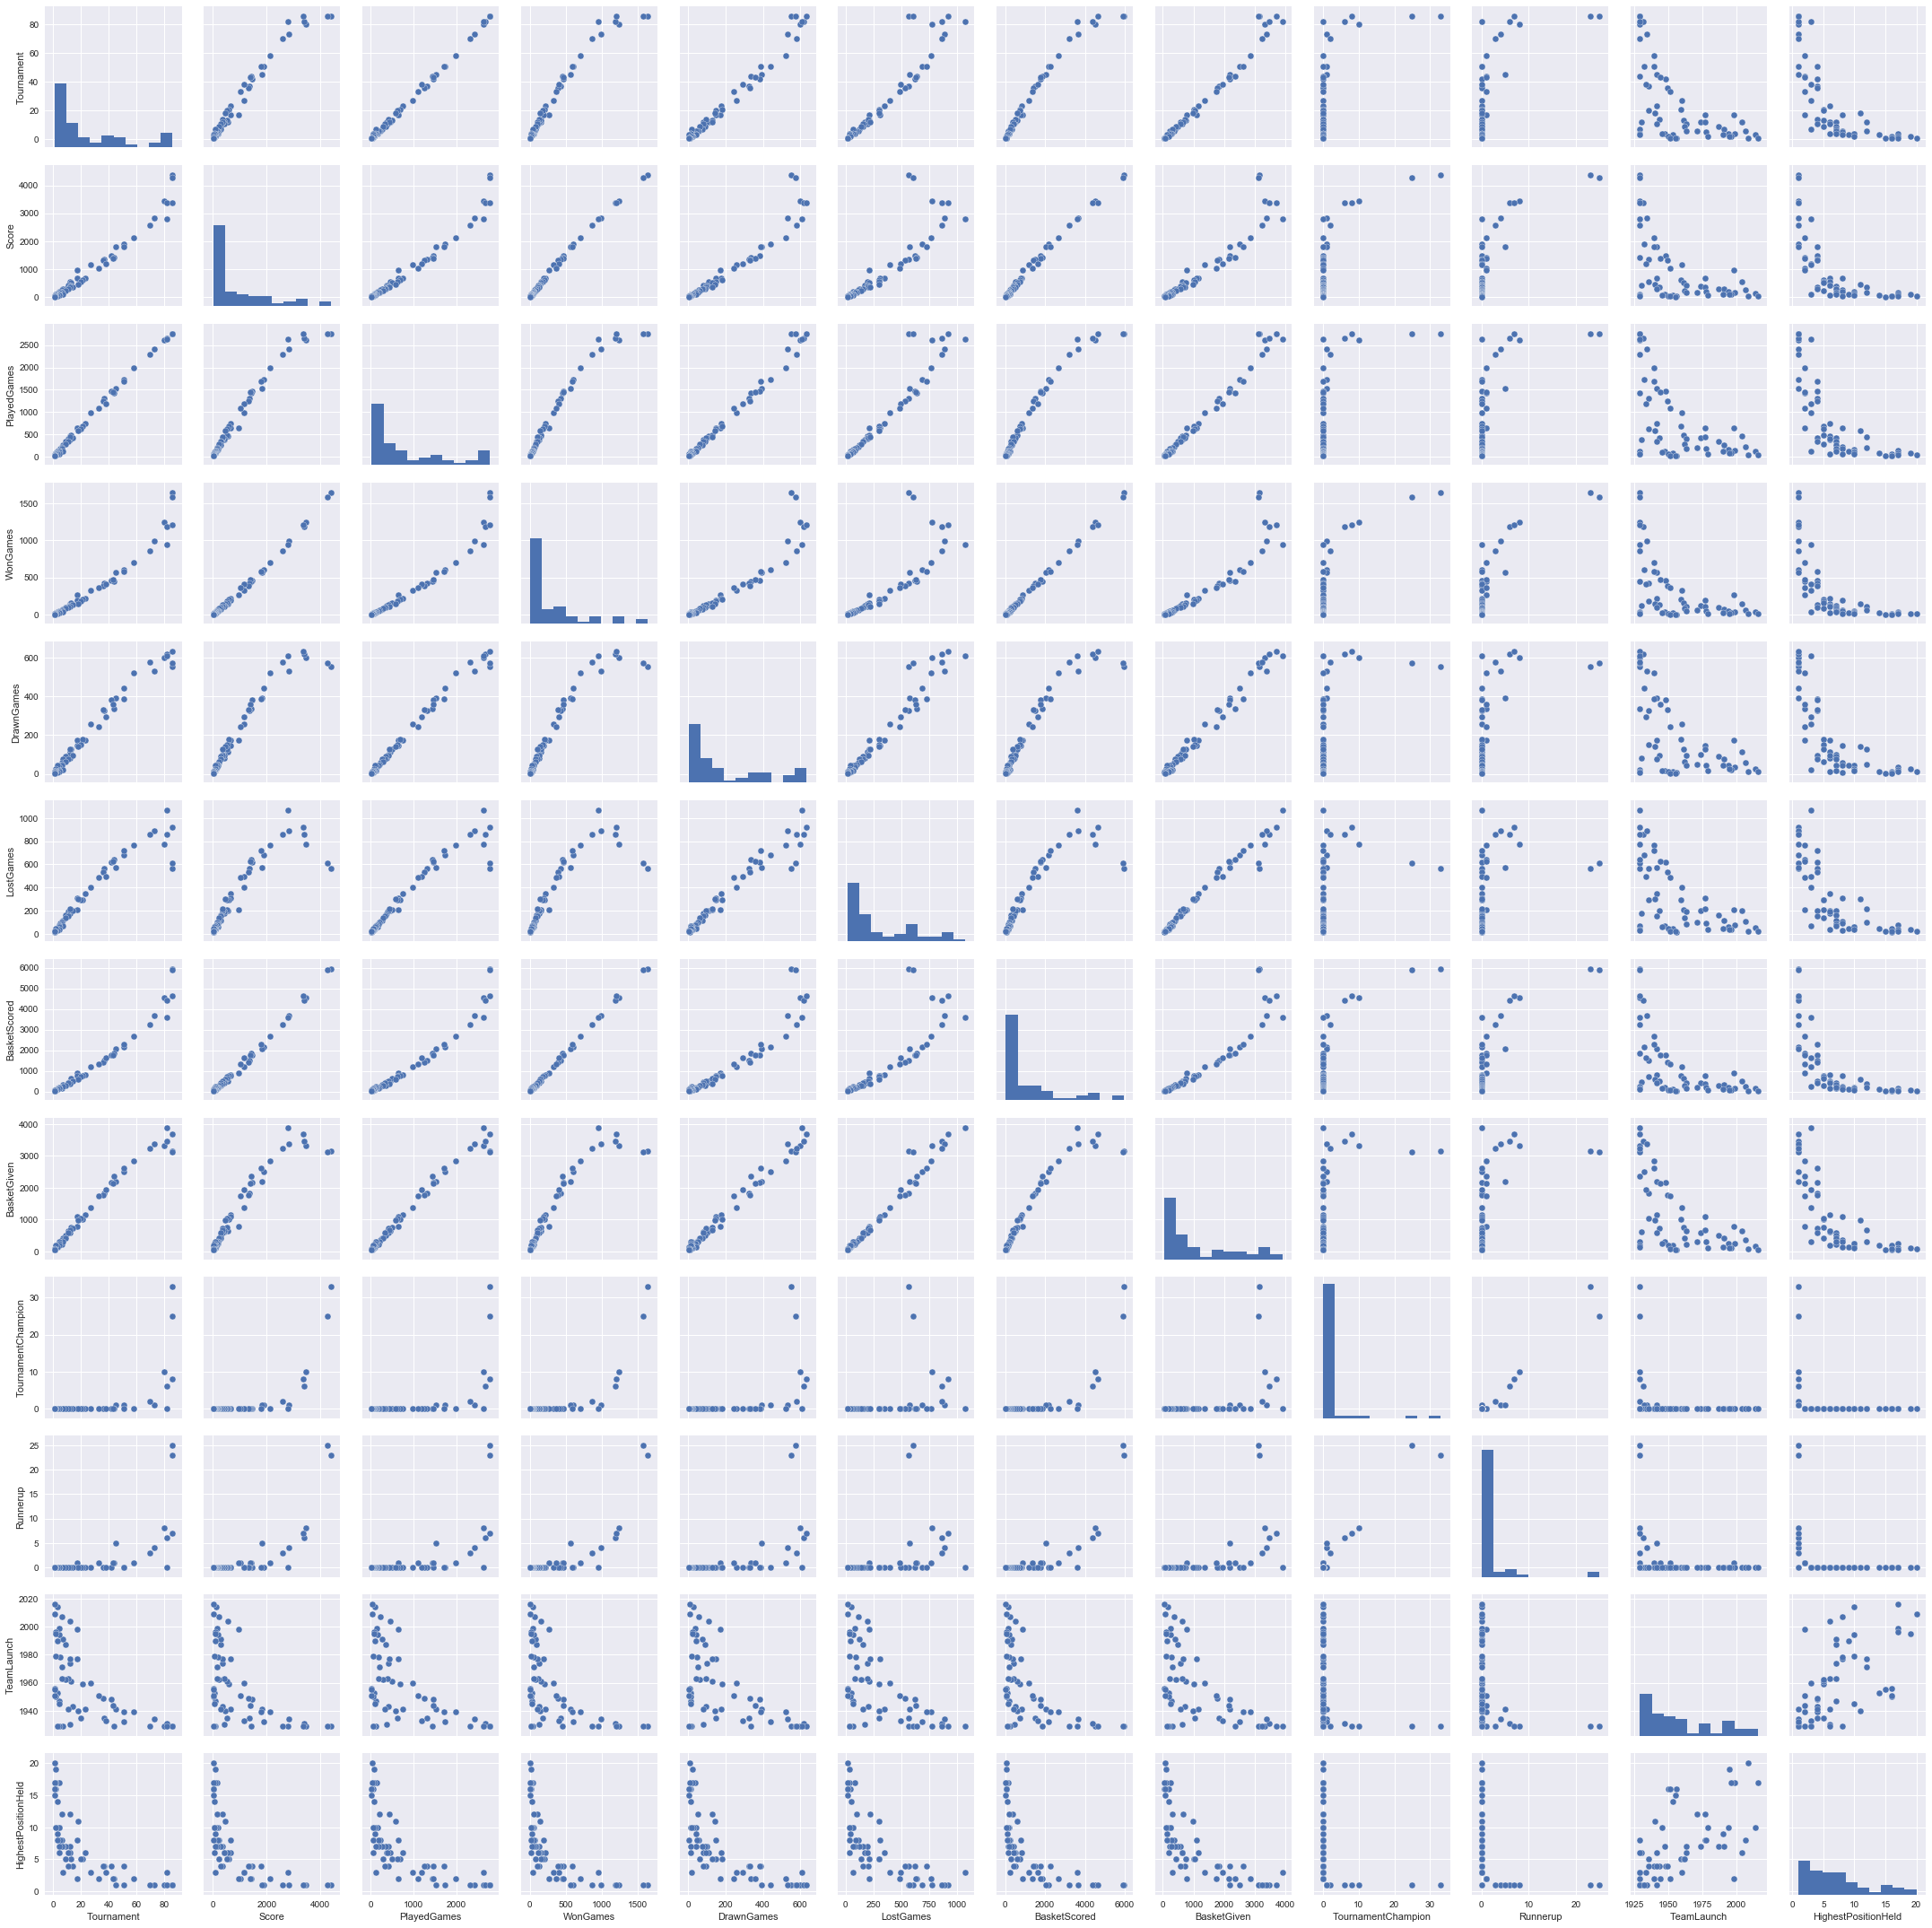

In [99]:
# Pairwise relationship
sns.pairplot(mydata[attrs])

- Comments

Pair plot is built on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

- Observations

Attribiutes are lineraly related as shown in the Pairgrid except for TeamLaunch and highestPositionHeld.

- Histogram for checking the Skewness

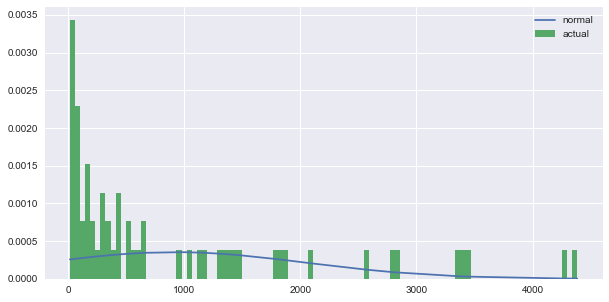

In [100]:
plt.figure(figsize=(10,5))
h=np.asarray(mydata['Score']);

fit=stats.norm.pdf(h,np.mean(h),np.std(h))
plt.plot(h,fit,label='normal')
plt.hist(h,bins=100,density = True,color='g', label='actual')
plt.legend()
plt.show()

As mentioned above given data set is RightSkewed or Postively Skewed .

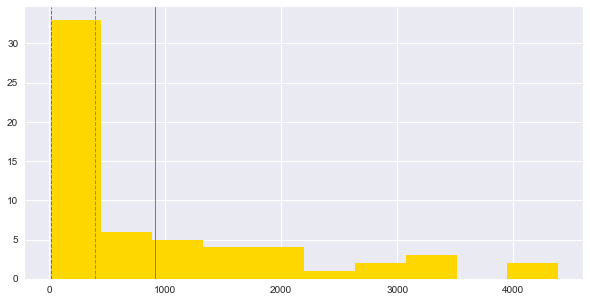

In [101]:
plt.figure(figsize=(10,5))
plt.hist(mydata.Score, color='gold') ;# plots a simple histogram
plt.axvline(mydata.Score.mean(), color='m', linewidth=1)
plt.axvline(mydata.Score.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(mydata.Score.mode()[0], color='b', linestyle='dashed', linewidth=1);

1.A bulk of the observations lie within the first bin out of 10 bins(almost 36 teams out of 61). Most of them got the score betwen 0 to 500

2.there are very few teams got more than 4000 approximatel 3 teams, generally we take them as outliers.

3.We can see from the above figure that the mode and the mean are not very close to each other and that the median is lower than both.

4.There are few teams whose score is more than 1500.

5.We dont have any team whose score is 3500 to 4000

- Score,BasketScored,WonGames So we see same kind of box plot result. There are outliers.
- TournamentChampion and RunnerUP dont have box at all because as we seen above in describe() 75% data has value as Zero.Remaining are outliers.
- If we see IQR of columns, Most of the columns has more values are scattered between median and Upper Quartile . So there is right skeweness in data

C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


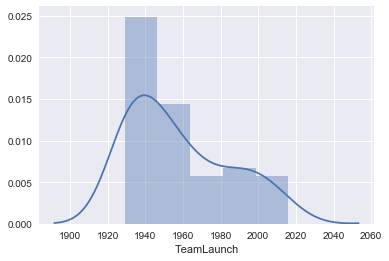

In [102]:
sns.distplot(mydata.TeamLaunch)

- Lets categorize data set based on team launch

In [103]:
mydata['TeamLaunchCategory'] = (pd.qcut(mydata['TeamLaunch'], 4, labels=['VeryOld', 'Old', 'New', 'VeryNew']));

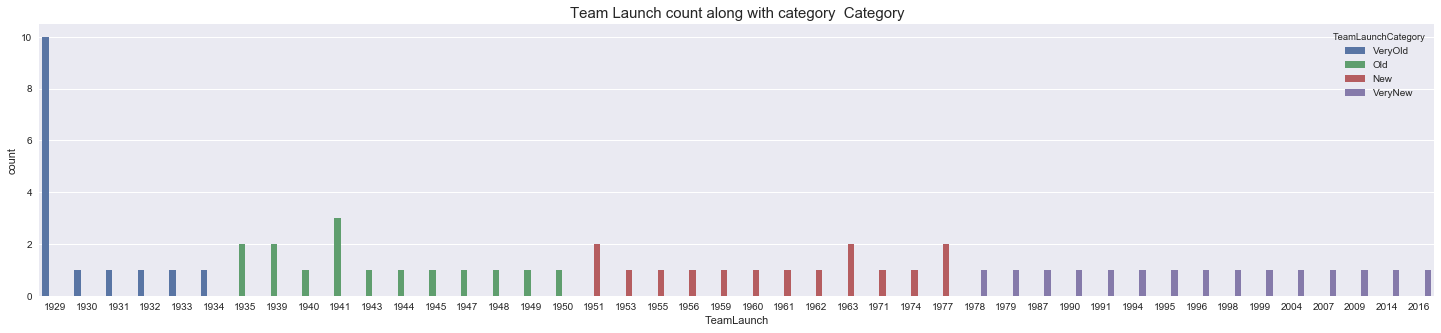

In [104]:
plt.figure(figsize=(25,5))
sns.countplot(x='TeamLaunch',hue='TeamLaunchCategory',data = mydata)
plt.title("Team Launch count along with category  Category",size=15)
plt.show()

### Performance Matrix

- Every team has different targets so to compare team performance preparing matrix based on indevidual team its own target and result
- We have perfect positivily corelated fields lets drop them to do easy analysis

In [105]:
cor_matrix = mydata.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [106]:
performaceMatrix=mydata[['Team','TeamLaunch','TeamLaunchCategory','PlayedGames','HighestPositionHeld']]
performaceMatrix['win']=round((mydata.WonGames/ mydata.PlayedGames)*100,2)
performaceMatrix['Drawn']=round((mydata.DrawnGames/ mydata.PlayedGames)*100,2)
performaceMatrix['Lost']=round((mydata.LostGames/ mydata.PlayedGames)*100,2)
performaceMatrix['TChampionship']=round((mydata.TournamentChampion/ mydata.Tournament)*100,2)
performaceMatrix['TRunnerup']=round((mydata.Runnerup/ mydata.Tournament)*100,2)
performaceMatrix.describe()

,TeamLaunch,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1957.950000,810.100000,7.050000,31.364667,23.617167,44.992167,1.749500,1.956333
std,26.646732,877.465393,5.315232,7.831421,4.459405,8.401111,6.442478,5.491846
min,1929.000000,30.000000,1.000000,16.670000,11.110000,20.380000,0.000000,0.000000
25%,1934.750000,115.500000,3.000000,27.610000,22.330000,41.147500,0.000000,0.000000
50%,1950.500000,424.500000,6.000000,30.490000,24.370000,45.725000,0.000000,0.000000
75%,1977.250000,1345.500000,10.000000,33.542500,26.212500,48.542500,0.000000,0.000000
max,2016.000000,2762.000000,20.000000,59.630000,38.600000,70.000000,38.370000,29.070000


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Win %')
sns.histplot(performaceMatrix['win'],color='green', kde=True)

plt.subplot(1, 3, 2)
plt.title('Drawn %')
sns.histplot(performaceMatrix['Drawn'],color='blue', kde=True)

plt.subplot(1, 3, 3)
plt.title('Lost %')
sns.histplot(performaceMatrix['Lost'],color='red', kde=True);

C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


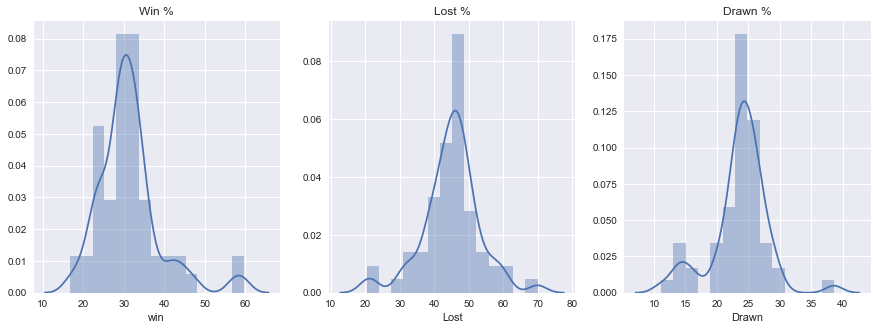

In [107]:
fig, ax = plt.subplots(1, 3)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(performaceMatrix['win'], ax = ax[0])
sns.distplot(performaceMatrix['Lost'], ax = ax[1])
sns.distplot(performaceMatrix['Drawn'], ax = ax[2])
ax[0].set_title('Win %')
ax[1].set_title('Lost %')
ax[2].set_title('Drawn %')
plt.show()


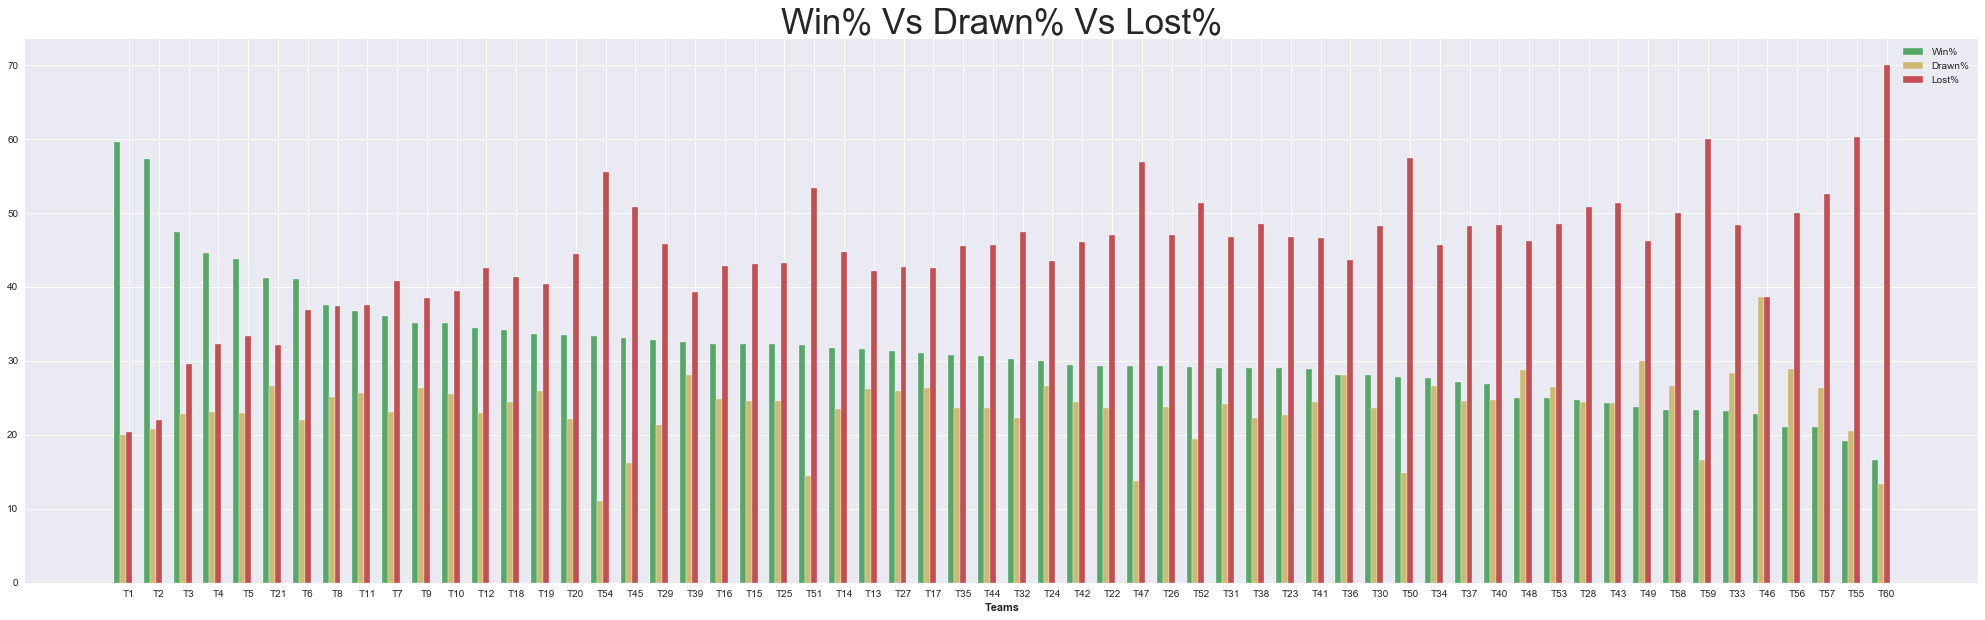

In [108]:
SortedDf=performaceMatrix.sort_values('win',ascending=False);
 
plt.figure(figsize=(35,10));
# set height of bar
bars1 = SortedDf.win
bars2 = SortedDf.Drawn
bars3 = SortedDf.Lost
 # set width of bar
barWidth =  0.2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plotax
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='Win%')
plt.bar(r2, bars2, color='y', width=barWidth, edgecolor='white', label='Drawn%')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='Lost%')

# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (3*barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("Win% Vs Drawn% Vs Lost%",size=35)


    
# Create legend & Show graphic
plt.legend()
plt.show()


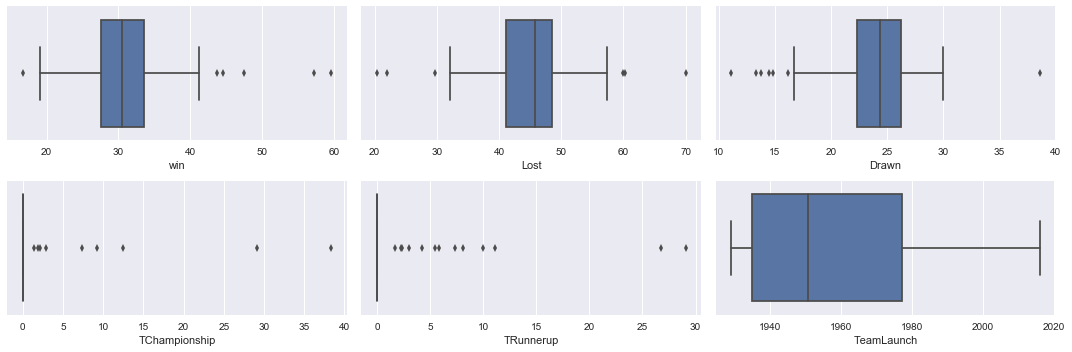

In [109]:
fig, ax = plt.subplots(2, 3)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(x=performaceMatrix['win'],ax=ax[0][0]);
sns.boxplot(x=performaceMatrix['Lost'],ax=ax[0][1]);
sns.boxplot(x=performaceMatrix['Drawn'],ax=ax[0][2]);
sns.boxplot(x=performaceMatrix['TChampionship'],ax=ax[1][0]);
sns.boxplot(x=performaceMatrix['TRunnerup'],ax=ax[1][1]);
sns.boxplot(x=performaceMatrix['TeamLaunch'],ax=ax[1][2]);


fig.tight_layout() 
plt.show()


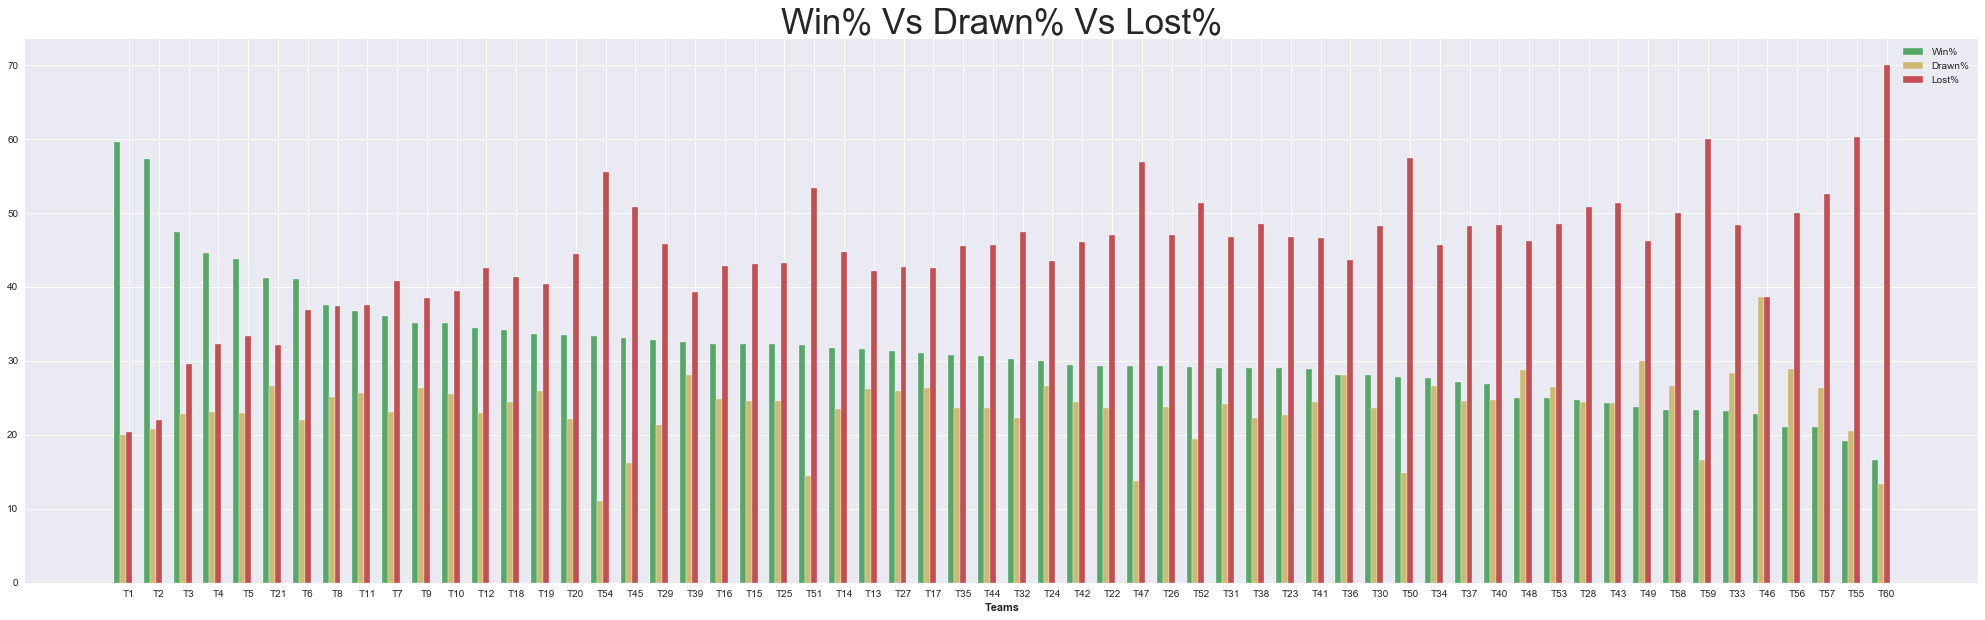

In [110]:
SortedDf=performaceMatrix.sort_values('win',ascending=False);
 
plt.figure(figsize=(35,10));
# set height of bar
bars1 = SortedDf.win
bars2 = SortedDf.Drawn
bars3 = SortedDf.Lost
 # set width of bar
barWidth =  0.2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plotax
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='Win%')
plt.bar(r2, bars2, color='y', width=barWidth, edgecolor='white', label='Drawn%')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='Lost%')

# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (3*barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("Win% Vs Drawn% Vs Lost%",size=35)


    
# Create legend & Show graphic
plt.legend()
plt.show()


In [111]:
# Let's find the outlier in the data with respect to win, draw, lost percentages

mydata = performaceMatrix[['win','Drawn','Lost']];

Z-Score is essentially how many standard deviations away is my actual value from the mean value.

In [112]:
# calculation zscore for win,lost & draw
for col in mydata.columns:
    col_zscore = col + "_zscore"
    mydata[col_zscore] = (mydata[col] - mydata[col].mean())/mydata[col].std(ddof=0)

mydata.head()

,win,Drawn,Lost,win_zscore,Drawn_zscore,Lost_zscore
0,59.63,19.99,20.38,3.639680,-0.820239,-2.954356
1,57.24,20.75,22.01,3.331924,-0.648374,-2.758696
2,47.48,22.88,29.65,2.075145,-0.166701,-1.841618
3,44.56,23.12,32.32,1.699141,-0.112428,-1.521121
4,43.77,22.92,33.31,1.597414,-0.157656,-1.402285


In [113]:
# outliers in the data
for col in ['win', 'Drawn', 'Lost']:
    col_zscore = col + "_zscore"
    col_ourlier = col + '_outlier'
    mydata[col_ourlier] = (abs(mydata[col_zscore])>3).astype(int)
mydata.head()

,win,Drawn,Lost,win_zscore,Drawn_zscore,Lost_zscore,win_outlier,Drawn_outlier,Lost_outlier
0,59.63,19.99,20.38,3.639680,-0.820239,-2.954356,1,0,0
1,57.24,20.75,22.01,3.331924,-0.648374,-2.758696,1,0,0
2,47.48,22.88,29.65,2.075145,-0.166701,-1.841618,0,0,0
3,44.56,23.12,32.32,1.699141,-0.112428,-1.521121,0,0,0
4,43.77,22.92,33.31,1.597414,-0.157656,-1.402285,0,0,0


In [114]:
# outliers in win with threshold  3
mydata.loc[mydata.win_outlier ==1]

,win,Drawn,Lost,win_zscore,Drawn_zscore,Lost_zscore,win_outlier,Drawn_outlier,Lost_outlier
0,59.63,19.99,20.38,3.639680,-0.820239,-2.954356,1,0,0
1,57.24,20.75,22.01,3.331924,-0.648374,-2.758696,1,0,0


In [115]:
# outliers in Drawn with threshold  3
mydata.loc[mydata.Drawn_outlier == 1]

,win,Drawn,Lost,win_zscore,Drawn_zscore,Lost_zscore,win_outlier,Drawn_outlier,Lost_outlier
45,22.81,38.6,38.6,-1.10157,3.388181,-0.767293,0,1,0


In [116]:
# outliers in Lost with threshold  3
mydata.loc[mydata.Lost_outlier ==1]

,win,Drawn,Lost,win_zscore,Drawn_zscore,Lost_zscore,win_outlier,Drawn_outlier,Lost_outlier
59,16.67,13.33,70.0,-1.892208,-2.326315,3.00185,0,0,1


Observations: As per the observations for a threshold of 3.

- Team 1 & Team 2 → has more win % than from any other Team.
- Team 46 → more Draw % than any other Team.
- Team 60 → more Lost % than any other Team.

- Finding Outliers using Z score

In [117]:
mydata = performaceMatrix[['win','Drawn','Lost']];

z = np.abs(stats.zscore(mydata))  # get the z-score of every value with respect to their columns
threshold = 3
np.where(z > threshold)

(array([ 0,  1, 45, 59], dtype=int64), array([0, 0, 1, 2], dtype=int64))

In [118]:
performaceMatrix.iloc[[0,1,45,59]]

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
0,T1,1929,VeryOld,2762,1,59.63,19.99,20.38,38.37,26.74
1,T2,1929,VeryOld,2762,1,57.24,20.75,22.01,29.07,29.07
45,T46,1990,VeryNew,114,9,22.81,38.60,38.60,0.00,0.00
59,T60,1955,New,30,15,16.67,13.33,70.00,0.00,0.00


- Outliers are T1 and T2 with more win % , far from other data points .
- T46 team has more drawn percentage far from data points.
- T60 team has more lost percentage far from data points

### Bivariate Anyalysis

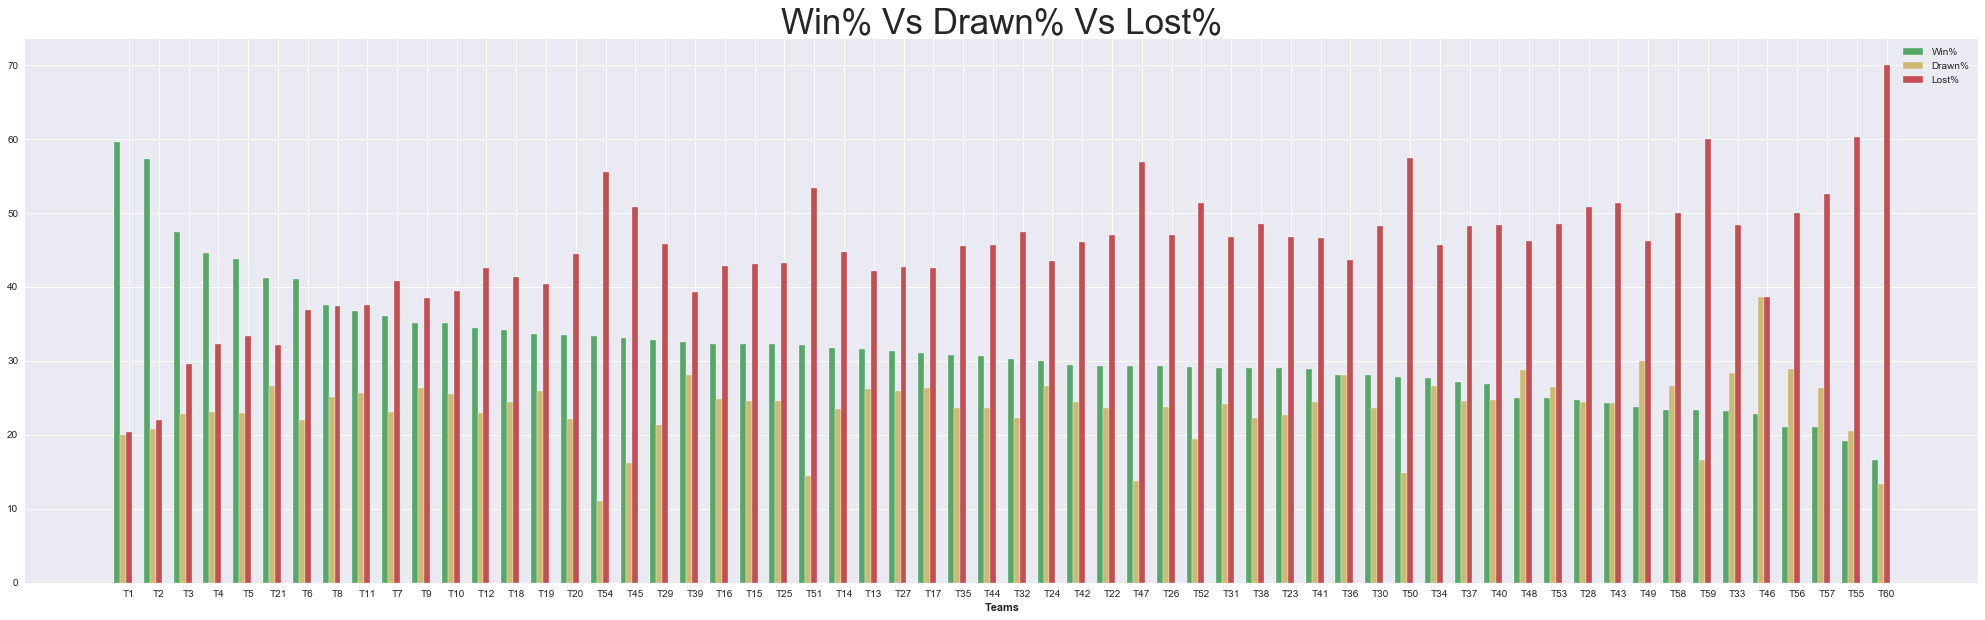

In [119]:
SortedDf=performaceMatrix.sort_values('win',ascending=False);
 
plt.figure(figsize=(35,10));
# set height of bar
bars1 = SortedDf.win
bars2 = SortedDf.Drawn
bars3 = SortedDf.Lost
 # set width of bar
barWidth =  0.2
# Set position of bar on X axis
r1 = np.arange(len(bars1))+barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plotax
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='Win%')
plt.bar(r2, bars2, color='y', width=barWidth, edgecolor='white', label='Drawn%')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='Lost%')

# Add xticks on the middle of the group bars
plt.xlabel('Teams', fontweight='bold')
plt.xticks([r + (3*barWidth) for r in range(len(bars1))], SortedDf.Team)
plt.title("Win% Vs Drawn% Vs Lost%",size=35)


    
# Create legend & Show graphic
plt.legend()
plt.show()


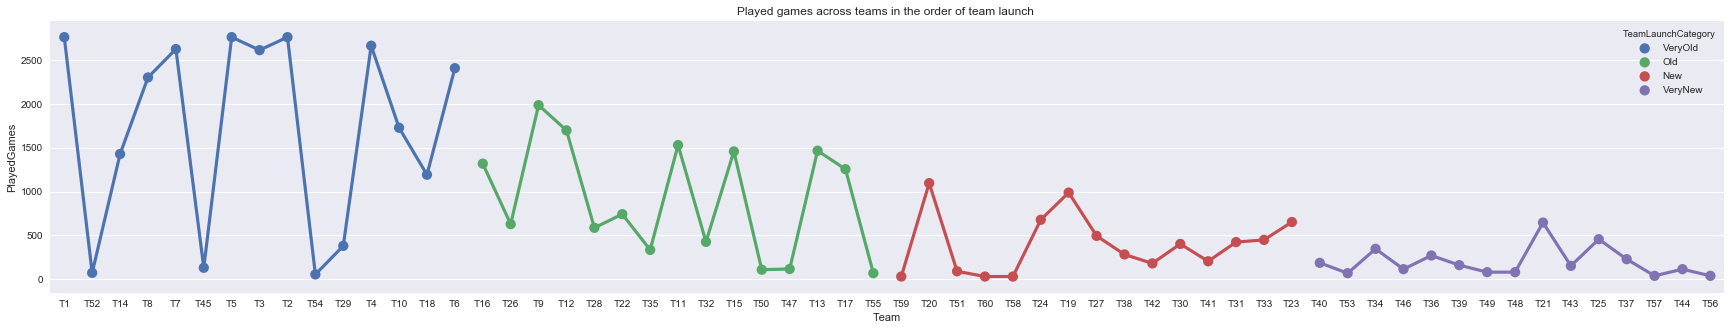

In [120]:
SortedDf=(performaceMatrix.sort_values(['TeamLaunch'],ascending=[True]))

plt.figure(figsize=(30,5))
sns.pointplot(x='Team',y='PlayedGames',hue='TeamLaunchCategory' ,data=SortedDf);
plt.title("Played games across teams in the order of team launch ")
plt.show()

Text(0.5,1,'HighestPositionHeld')

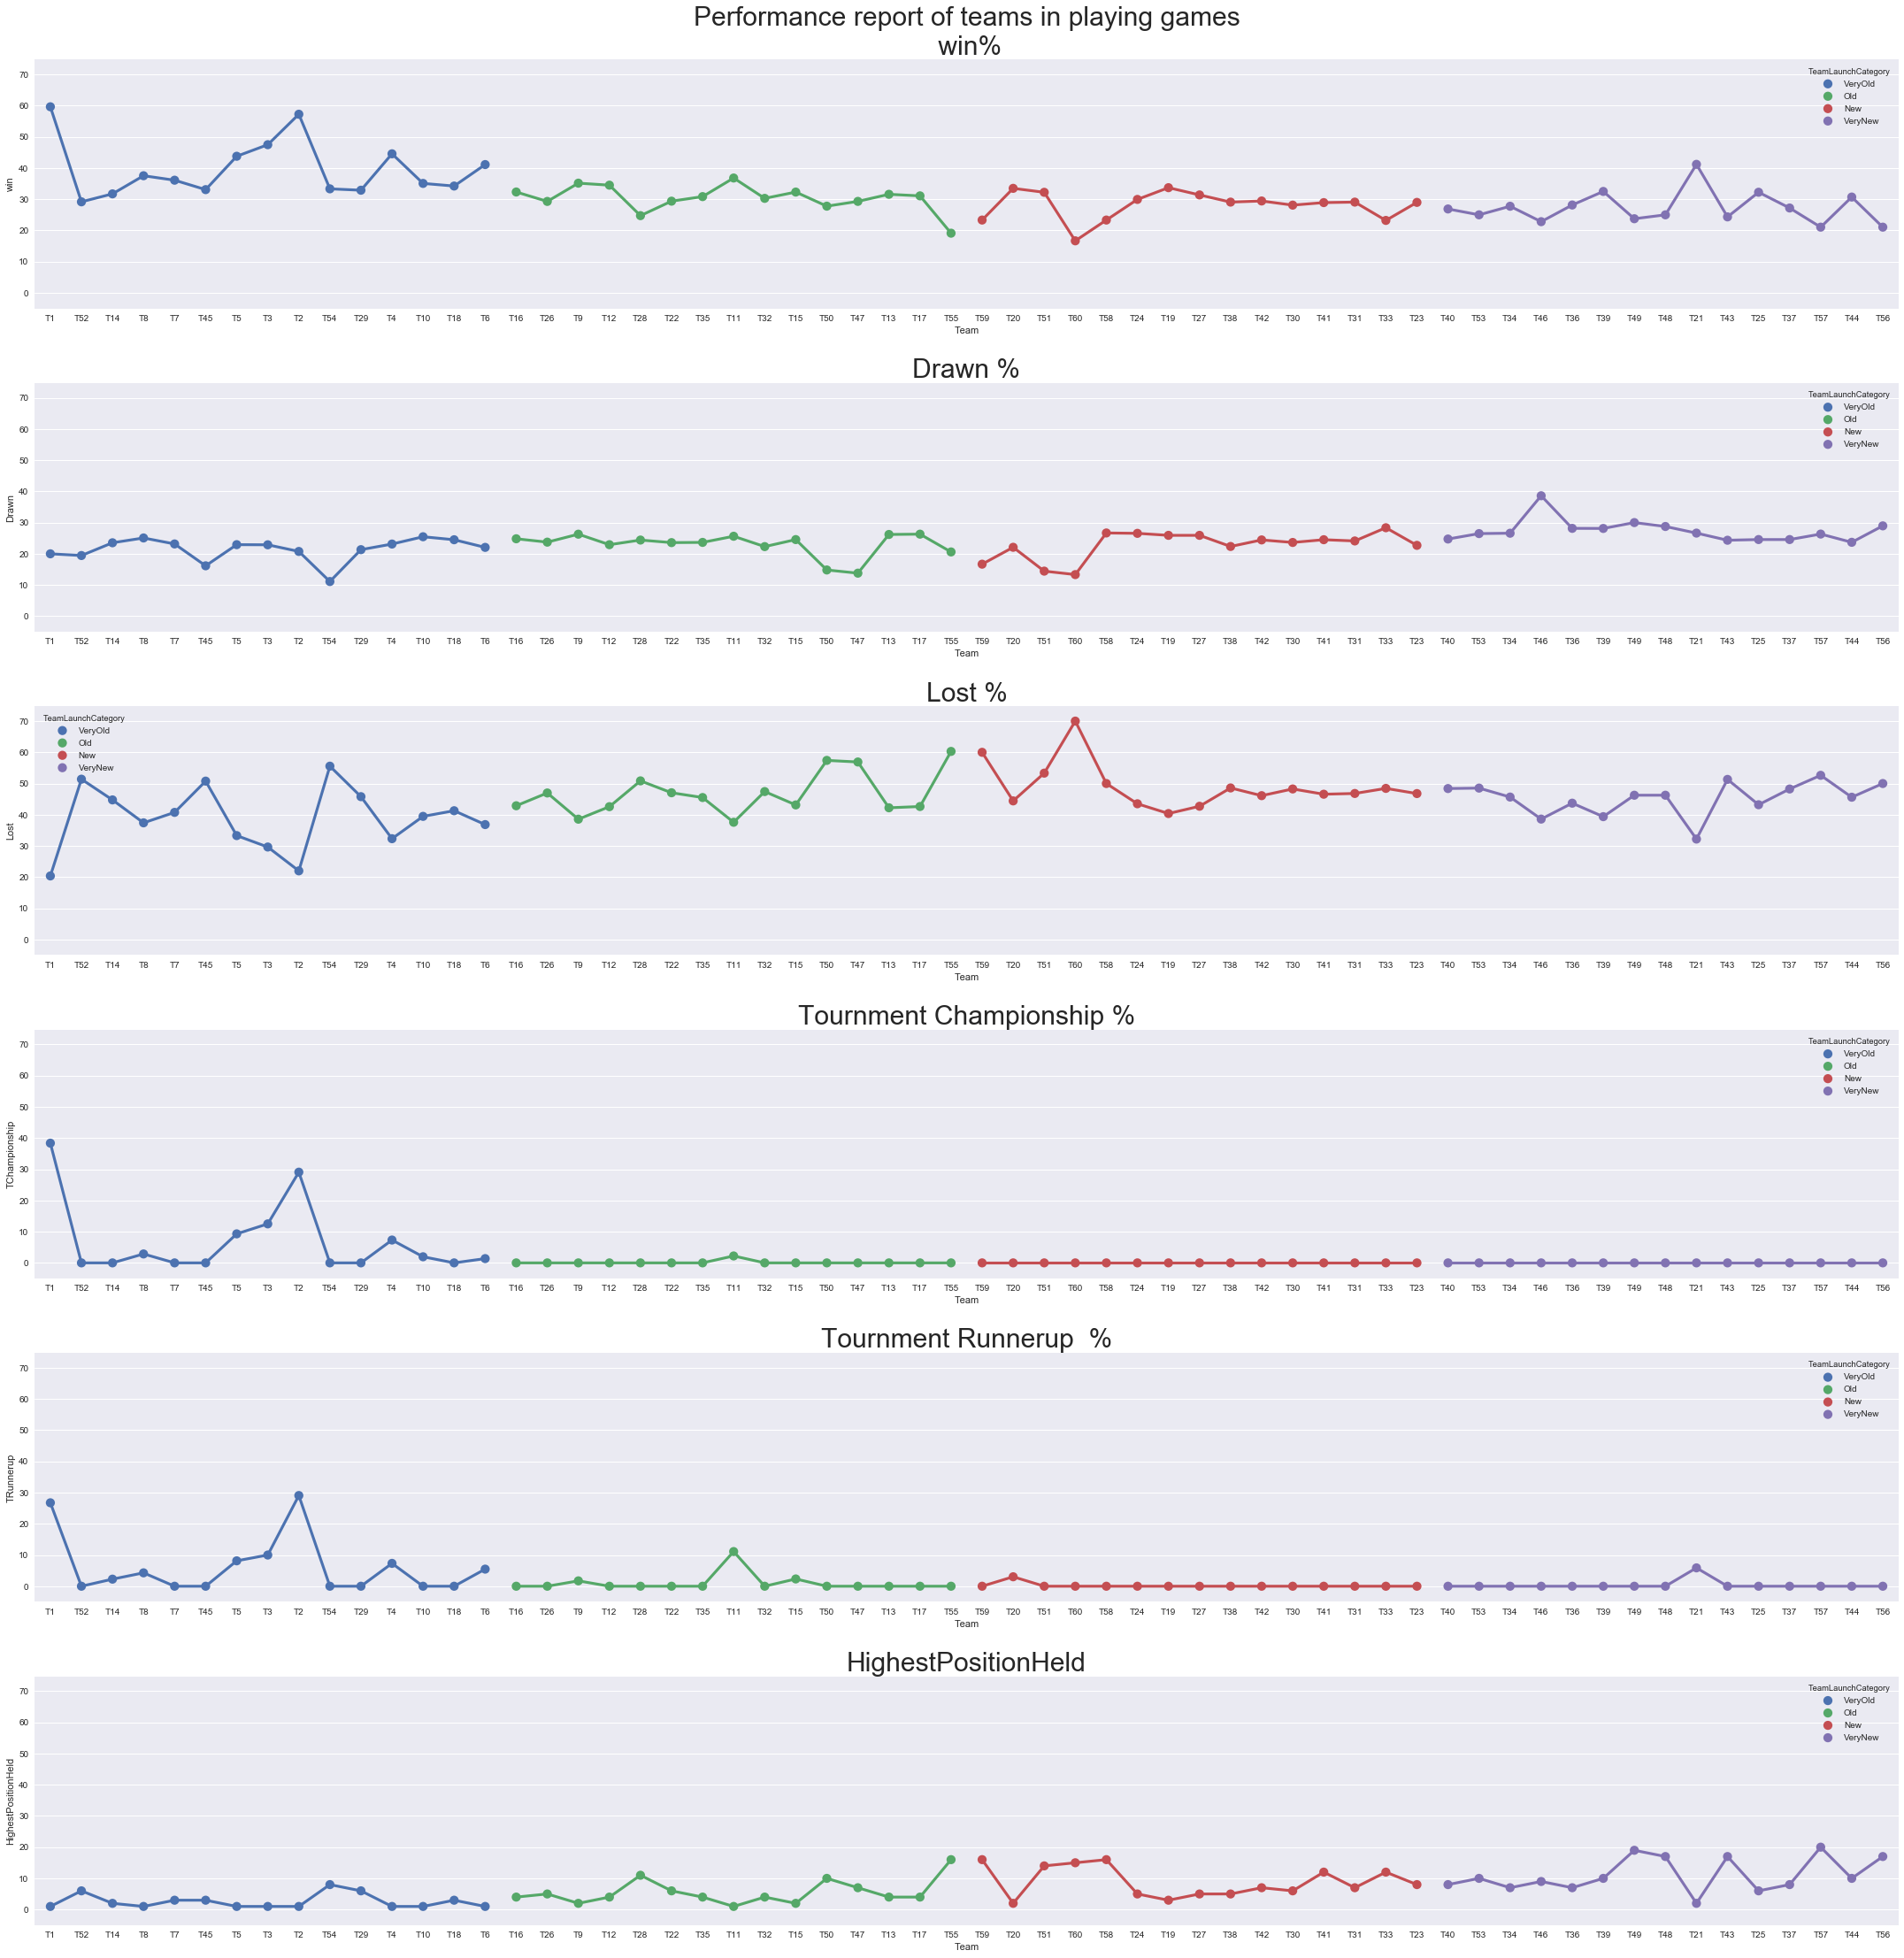

In [121]:
SortedDf=(performaceMatrix.sort_values(['TeamLaunch'],ascending=[True]))
fig, ax =plt.subplots(6,figsize=(30, 30), sharey=True)

sns.pointplot(x='Team',y='win',hue='TeamLaunchCategory' ,data=SortedDf,ax=ax[0]);
sns.pointplot(x='Team',y='Drawn',hue='TeamLaunchCategory' ,data=SortedDf,ax=ax[1]);
sns.pointplot(x='Team',y='Lost',hue='TeamLaunchCategory' ,data=SortedDf,ax=ax[2]);
sns.pointplot(x='Team',y='TChampionship',hue='TeamLaunchCategory' ,data=SortedDf,ax=ax[3]);
sns.pointplot(x='Team',y='TRunnerup',hue='TeamLaunchCategory' ,data=SortedDf,ax=ax[4]);
sns.pointplot(x='Team',y='HighestPositionHeld',hue='TeamLaunchCategory' ,data=SortedDf,ax=ax[5]);


fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
ax[0].set_title("Performance report of teams in playing games\n win%",size='30')
ax[1].set_title("Drawn %",size='30')
ax[2].set_title("Lost %",size='30')
ax[3].set_title("Tournment Championship %",size='30')
ax[4].set_title("Tournment Runnerup  %",size='30')
ax[5].set_title("HighestPositionHeld",size='30')

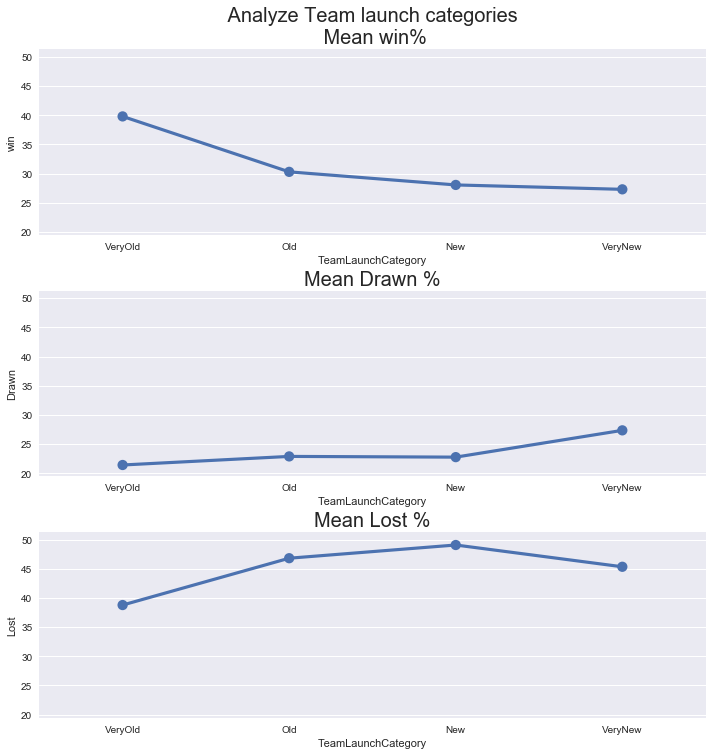

In [122]:
groupLostMean=performaceMatrix.groupby(['TeamLaunchCategory'])['Lost'].mean().reset_index();
groupDrawnMean=performaceMatrix.groupby(['TeamLaunchCategory'])['Drawn'].mean().reset_index();
groupWinMean=performaceMatrix.groupby(['TeamLaunchCategory'])['win'].mean().reset_index();

fig, ax =plt.subplots((3),figsize=(10, 10), sharey=True)

sns.pointplot(x=groupWinMean.TeamLaunchCategory,y=groupWinMean.win,data=groupWinMean,ax=ax[0]);
sns.pointplot(x=groupDrawnMean.TeamLaunchCategory,y=groupDrawnMean.Drawn,data=groupDrawnMean,ax=ax[1]);
sns.pointplot(x=groupLostMean.TeamLaunchCategory,y=groupLostMean.Lost,data=groupLostMean,ax=ax[2]);

fig.tight_layout()
plt.subplots_adjust(hspace=0.3)
ax[0].set_title(" Analyze Team launch categories \n Mean win%",size='20')
ax[1].set_title("Mean Drawn %",size='20')
ax[2].set_title("Mean Lost %",size='20')
plt.show()

1. Average drawn across team launch category is high for very new teams comapred to old teams so , by giving some more practise this drawn can be converted to success.

2. average Lost across team launch category is low for very new teams comapred to other teams so , very new teams are better compared old/ new teams

3. average success across team launch category is high for very old teams and gradully decreasing for newst teams

1. Top 10 teams in the given list with Hightest winning percentage

In [123]:
performaceMatrix.sort_values(['win'],ascending=[False]).head(10)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
0,T1,1929,VeryOld,2762,1,59.63,19.99,20.38,38.37,26.74
1,T2,1929,VeryOld,2762,1,57.24,20.75,22.01,29.07,29.07
2,T3,1929,VeryOld,2614,1,47.48,22.88,29.65,12.50,10.00
3,T4,1931,VeryOld,2664,1,44.56,23.12,32.32,7.32,7.32
4,T5,1929,VeryOld,2762,1,43.77,22.92,33.31,9.30,8.14
20,T21,1998,VeryNew,646,2,41.18,26.63,32.20,0.00,5.88
5,T6,1934,VeryOld,2408,1,41.11,22.05,36.84,1.37,5.48
7,T8,1929,VeryOld,2302,1,37.53,25.07,37.40,2.86,4.29
10,T11,1941,Old,1530,1,36.80,25.62,37.58,2.22,11.11
6,T7,1929,VeryOld,2626,3,36.10,23.15,40.75,0.00,0.00


2. Best performed Team in Given data set

In [124]:
performaceMatrix[(performaceMatrix.win==performaceMatrix.win.max()) & (performaceMatrix.Lost==performaceMatrix.Lost.min() )]

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
0,T1,1929,VeryOld,2762,1,59.63,19.99,20.38,38.37,26.74


3. Top 10 winning teams in Given data set excluding very old teams

In [125]:
performaceMatrix[performaceMatrix.TeamLaunchCategory != 'VeryOld'].sort_values(['win'],ascending=[False]).head(10)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
20,T21,1998,VeryNew,646,2,41.18,26.63,32.20,0.00,5.88
10,T11,1941,Old,1530,1,36.80,25.62,37.58,2.22,11.11
8,T9,1939,Old,1986,2,35.15,26.28,38.57,0.00,1.72
11,T12,1939,Old,1698,4,34.51,22.91,42.58,0.00,0.00
18,T19,1960,New,988,3,33.70,25.91,40.38,0.00,0.00
19,T20,1951,New,1096,2,33.49,22.08,44.43,0.00,3.03
38,T39,1994,VeryNew,160,10,32.50,28.12,39.38,0.00,0.00
15,T16,1935,Old,1318,4,32.32,24.81,42.87,0.00,0.00
14,T15,1944,Old,1458,2,32.30,24.55,43.14,0.00,2.33
24,T25,2004,VeryNew,456,6,32.24,24.56,43.20,0.00,0.00


4.Old Teams with less performace.

In [126]:
sorted=performaceMatrix.loc[performaceMatrix['TeamLaunchCategory']=='VeryOld'].sort_values(['win'],ascending=[True])
sorted.head(5)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
51,T52,1929,VeryOld,72,6,29.17,19.44,51.39,0.0,0.00
13,T14,1929,VeryOld,1428,2,31.72,23.53,44.75,0.0,2.27
28,T29,1930,VeryOld,380,6,32.89,21.32,45.79,0.0,0.00
44,T45,1929,VeryOld,130,3,33.08,16.15,50.77,0.0,0.00
53,T54,1929,VeryOld,54,8,33.33,11.11,55.56,0.0,0.00


5.Team with Most Drawn games

In [127]:
performaceMatrix.sort_values(['Drawn'],ascending=[False]).head(1)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
45,T46,1990,VeryNew,114,9,22.81,38.6,38.6,0.0,0.0


- By giving more practice we can turn this drawn to win percentage

In [128]:
# Top 10 Teams with highest Winning Percentage
performaceMatrix.sort_values(['win'],ascending=[False]).head(10)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
0,T1,1929,VeryOld,2762,1,59.63,19.99,20.38,38.37,26.74
1,T2,1929,VeryOld,2762,1,57.24,20.75,22.01,29.07,29.07
2,T3,1929,VeryOld,2614,1,47.48,22.88,29.65,12.50,10.00
3,T4,1931,VeryOld,2664,1,44.56,23.12,32.32,7.32,7.32
4,T5,1929,VeryOld,2762,1,43.77,22.92,33.31,9.30,8.14
20,T21,1998,VeryNew,646,2,41.18,26.63,32.20,0.00,5.88
5,T6,1934,VeryOld,2408,1,41.11,22.05,36.84,1.37,5.48
7,T8,1929,VeryOld,2302,1,37.53,25.07,37.40,2.86,4.29
10,T11,1941,Old,1530,1,36.80,25.62,37.58,2.22,11.11
6,T7,1929,VeryOld,2626,3,36.10,23.15,40.75,0.00,0.00


In [129]:
# Top 10 Teams with lowest Winning Percentage
performaceMatrix.sort_values(['win'],ascending=[True]).head(10)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
59,T60,1955,New,30,15,16.67,13.33,70.00,0.0,0.0
54,T55,1950,Old,68,16,19.12,20.59,60.29,0.0,0.0
56,T57,2009,VeryNew,38,20,21.05,26.32,52.63,0.0,0.0
55,T56,2016,VeryNew,38,17,21.05,28.95,50.00,0.0,0.0
45,T46,1990,VeryNew,114,9,22.81,38.60,38.60,0.0,0.0
32,T33,1977,New,448,12,23.21,28.35,48.44,0.0,0.0
57,T58,1956,New,30,16,23.33,26.67,50.00,0.0,0.0
58,T59,1951,New,30,16,23.33,16.67,60.00,0.0,0.0
48,T49,1995,VeryNew,80,19,23.75,30.00,46.25,0.0,0.0
42,T43,1999,VeryNew,152,17,24.34,24.34,51.32,0.0,0.0


In [130]:
# Top 10 Teams with highest Lost Percentage
performaceMatrix.sort_values(['Lost'],ascending=[False]).head(10)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
59,T60,1955,New,30,15,16.67,13.33,70.00,0.0,0.0
54,T55,1950,Old,68,16,19.12,20.59,60.29,0.0,0.0
58,T59,1951,New,30,16,23.33,16.67,60.00,0.0,0.0
49,T50,1945,Old,108,10,27.78,14.81,57.41,0.0,0.0
46,T47,1947,Old,116,7,29.31,13.79,56.90,0.0,0.0
53,T54,1929,VeryOld,54,8,33.33,11.11,55.56,0.0,0.0
50,T51,1953,New,90,14,32.22,14.44,53.33,0.0,0.0
56,T57,2009,VeryNew,38,20,21.05,26.32,52.63,0.0,0.0
51,T52,1929,VeryOld,72,6,29.17,19.44,51.39,0.0,0.0
42,T43,1999,VeryNew,152,17,24.34,24.34,51.32,0.0,0.0


In [131]:
# Top 10 Teams with lowest Draw Percentage
performaceMatrix.sort_values(['Drawn'],ascending=[True]).head(10)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
53,T54,1929,VeryOld,54,8,33.33,11.11,55.56,0.00,0.00
59,T60,1955,New,30,15,16.67,13.33,70.00,0.00,0.00
46,T47,1947,Old,116,7,29.31,13.79,56.90,0.00,0.00
50,T51,1953,New,90,14,32.22,14.44,53.33,0.00,0.00
49,T50,1945,Old,108,10,27.78,14.81,57.41,0.00,0.00
44,T45,1929,VeryOld,130,3,33.08,16.15,50.77,0.00,0.00
58,T59,1951,New,30,16,23.33,16.67,60.00,0.00,0.00
51,T52,1929,VeryOld,72,6,29.17,19.44,51.39,0.00,0.00
0,T1,1929,VeryOld,2762,1,59.63,19.99,20.38,38.37,26.74
54,T55,1950,Old,68,16,19.12,20.59,60.29,0.00,0.00


In [132]:
# Top 10 Teams with lowest Draw Percentage
performaceMatrix.sort_values(['Drawn'],ascending=[False]).head(10)

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
45,T46,1990,VeryNew,114,9,22.81,38.60,38.60,0.0,0.00
48,T49,1995,VeryNew,80,19,23.75,30.00,46.25,0.0,0.00
55,T56,2016,VeryNew,38,17,21.05,28.95,50.00,0.0,0.00
47,T48,1996,VeryNew,80,17,25.00,28.75,46.25,0.0,0.00
32,T33,1977,New,448,12,23.21,28.35,48.44,0.0,0.00
35,T36,1991,VeryNew,270,7,28.15,28.15,43.70,0.0,0.00
38,T39,1994,VeryNew,160,10,32.50,28.12,39.38,0.0,0.00
57,T58,1956,New,30,16,23.33,26.67,50.00,0.0,0.00
20,T21,1998,VeryNew,646,2,41.18,26.63,32.20,0.0,5.88
33,T34,1987,VeryNew,346,7,27.75,26.59,45.66,0.0,0.00


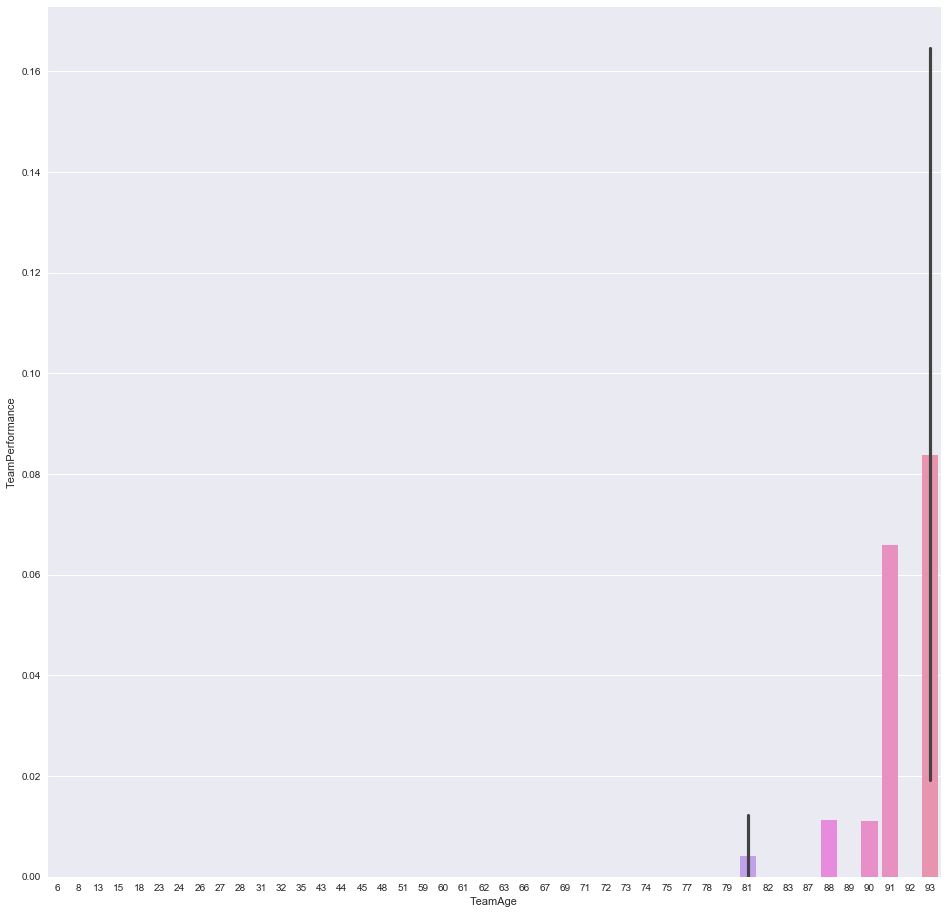

In [133]:
# Let's find the team with better performance
plt.figure(figsize = (16,16))
# Plot the teamAge against the Team Performance
sns.barplot(x='TeamAge', y='TeamPerformance',data=df_1)

- It is observed that Team of the age 91 has better performance.(Team 1, 2 and 3)
- It is observed that Team of age 91 and 79 has Won more games with respect to the total games played.

In [134]:
#  Let's find the correlation matrix between all the performance metrics
corr=df_1.corr()
corr

,TeamAge,TeamExperience,TeamPerformance,WinningPercentage,Champions
TeamAge,1.000000,0.016066,0.287642,0.491259,0.294691
TeamExperience,0.016066,1.000000,-0.154013,-0.459467,-0.158242
TeamPerformance,0.287642,-0.154013,1.000000,0.766396,0.999543
WinningPercentage,0.491259,-0.459467,0.766396,1.000000,0.772811
Champions,0.294691,-0.158242,0.999543,0.772811,1.000000


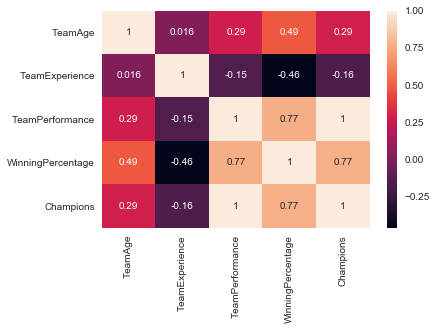

In [135]:
sns.heatmap(corr, annot = True)

- The Correlation table shows high correlation between Team Performance and Tournament Champions.

TOP 5 TEAMS FROM BELOW CONSOLIDATED TABLES A AND B CAN TREATED AS BEST PERFORMERS AND HENCE COMPANY CAN CHOOSE BETWEEN THESE TEAMS FOR SPONSORSHIP

In [136]:
df_2 = df_1.sort_values(by='WinningPercentage',ascending=False) # Top performing teams
print('TOP OLD TEAMS TABLE A')
df_2.sort_values(by='TeamAge',ascending=False).head(5) # Top Performing old teams

TOP OLD TEAMS TABLE A


,Team,TeamAge,TeamExperience,TeamPerformance,WinningPercentage,Champions
0,T1,93,1.081395,0.354839,0.596307,0.383721
51,T52,93,23.250000,0.000000,0.291667,0.000000
2,T3,93,1.162500,0.107527,0.474751,0.125000
4,T5,93,1.081395,0.086022,0.437726,0.093023
1,T2,93,1.081395,0.268817,0.572411,0.290698


In [137]:
df_3 = df_1.sort_values(by='TeamExperience',ascending=False) # Top performing teams
print('TOP OLD TEAMS :TABLE B')
df_3.sort_values(by='TeamAge',ascending=False).head(5)

TOP OLD TEAMS :TABLE B


,Team,TeamAge,TeamExperience,TeamPerformance,WinningPercentage,Champions
0,T1,93,1.081395,0.354839,0.596307,0.383721
4,T5,93,1.081395,0.086022,0.437726,0.093023
53,T54,93,31.000000,0.000000,0.333333,0.000000
51,T52,93,23.250000,0.000000,0.291667,0.000000
1,T2,93,1.081395,0.268817,0.572411,0.290698


In [138]:
df_2 = df_1.sort_values(by='WinningPercentage',ascending=False) # Top performing teams
print('TOP OLD TEAMS TABLE A')
df_2.sort_values(by='TeamAge',ascending=False).head(5) # Top Performing old teams

TOP OLD TEAMS TABLE A


,Team,TeamAge,TeamExperience,TeamPerformance,WinningPercentage,Champions
0,T1,93,1.081395,0.354839,0.596307,0.383721
51,T52,93,23.250000,0.000000,0.291667,0.000000
2,T3,93,1.162500,0.107527,0.474751,0.125000
4,T5,93,1.081395,0.086022,0.437726,0.093023
1,T2,93,1.081395,0.268817,0.572411,0.290698


In [139]:
# If Top Performing old teams above are already in contract with competitors 
# then below Young Teams Can be approach
print('Top Young Teams: TABLE A')
df_2.sort_values(by='TeamAge',ascending=True).head(5)

Top Young Teams: TABLE A


,Team,TeamAge,TeamExperience,TeamPerformance,WinningPercentage,Champions
55,T56,6,6.000000,0.0,0.210526,0.0
43,T44,8,2.666667,0.0,0.307018,0.0
56,T57,13,13.000000,0.0,0.210526,0.0
36,T37,15,2.500000,0.0,0.271930,0.0
24,T25,18,1.500000,0.0,0.322368,0.0


In [140]:
print('Top Young Teams: TABLE B')
df_3.sort_values(by='TeamAge',ascending=True).head(5)

Top Young Teams: TABLE B


,Team,TeamAge,TeamExperience,TeamPerformance,WinningPercentage,Champions
55,T56,6,6.000000,0.0,0.210526,0.0
43,T44,8,2.666667,0.0,0.307018,0.0
56,T57,13,13.000000,0.0,0.210526,0.0
36,T37,15,2.500000,0.0,0.271930,0.0
24,T25,18,1.500000,0.0,0.322368,0.0


Multivariate Analysis

- Correlation among all columns in data set

In [141]:
mydata.corr()

,win,Drawn,Lost
win,1.000000,-0.150212,-0.851454
Drawn,-0.150212,1.000000,-0.390061
Lost,-0.851454,-0.390061,1.000000


In [142]:
# absolute correlation
mydata.corr().abs()

,win,Drawn,Lost
win,1.000000,0.150212,0.851454
Drawn,0.150212,1.000000,0.390061
Lost,0.851454,0.390061,1.000000


- Correlation Map

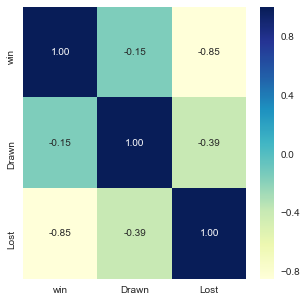

In [143]:
plt.figure(figsize=(5,5))
corrmat = mydata.corr(method='pearson')
sns.heatmap(corrmat, cmap="YlGnBu", fmt='.2f',annot=True)
plt.show();

- Graphical Representation above matrix.

<Figure size 720x720 with 0 Axes>

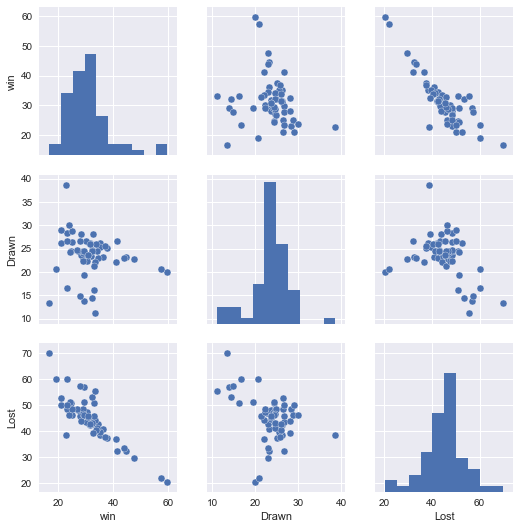

In [144]:
plt.figure(figsize=(10,10))
pairplot=sns.pairplot(mydata);
plt.show()

- Comments 

Pair plot is built on two basic figures, the histogram and the scatter plot. 
The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

- Observations

Attribiutes are lineraly related as shown in the Pairgrid except for TeamLaunch and highestPositionHeld.

In [145]:
cor_matrix = mydata.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

,win,Drawn,Lost
win,NaN,0.150212,0.851454
Drawn,NaN,NaN,0.390061
Lost,NaN,NaN,NaN


### Overall best successful Team but Team1 a old company and might have contracts

In [146]:
performaceMatrix[(performaceMatrix.win==performaceMatrix.win.max()) & (performaceMatrix.Lost==performaceMatrix.Lost.min() )]

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
0,T1,1929,VeryOld,2762,1,59.63,19.99,20.38,38.37,26.74


Declaring Team 1 as successful team in many aspects

Observations:

Team 1 is the successful team in many aspects.
Management can invest on the teams → Team 1, Team2, Team3.
Team 21 → launched recently but showing very good results. recommending this team as well.
Team 5 → has more drawn matches. With little bit of extra practise we can convert these draws into wins → recommending this as well.

Keeping in mind
- Teams which are already in contract with competitors
- The year for which the decision is to be made
- Top players of the team.


**As, Some of the older teams are already in contract with competitors. We focus on other teams.**

# Recommended Teams for company X, based on all above analysis

In [147]:
teamsFilters=['T21','T39','T46','T19','T20','T11','T9','T5','T3','T4','T6','T14','T7','T8','T10','T18']

betterTeams=pd.DataFrame(columns=performaceMatrix.columns);

for i in teamsFilters:
       if i in performaceMatrix.Team.values:
            betterTeams = pd.concat([betterTeams,performaceMatrix[ performaceMatrix.Team==i]], ignore_index=True)


In [148]:
betterTeams[betterTeams.TeamLaunchCategory!='VeryOld']

,Team,TeamLaunch,TeamLaunchCategory,PlayedGames,HighestPositionHeld,win,Drawn,Lost,TChampionship,TRunnerup
0,T21,1998,VeryNew,646,2,41.18,26.63,32.20,0.00,5.88
1,T39,1994,VeryNew,160,10,32.50,28.12,39.38,0.00,0.00
2,T46,1990,VeryNew,114,9,22.81,38.60,38.60,0.00,0.00
3,T19,1960,New,988,3,33.70,25.91,40.38,0.00,0.00
4,T20,1951,New,1096,2,33.49,22.08,44.43,0.00,3.03
5,T11,1941,Old,1530,1,36.80,25.62,37.58,2.22,11.11
6,T9,1939,Old,1986,2,35.15,26.28,38.57,0.00,1.72


3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point. [10 Marks]


*Please find below suggestions for data point collection

1. Highly correlated : The columns in the data set are highly correlated . It says that we have duplicancy of columns. So to measure performace of a team other than this duplicate columns, please check for any other points. WonGames = Basketsscored = Score.
Correlation: → The given data set has highly correlated information. this means we have duplicancy in our data.
Score, WonGames, BasketScored → correlation value is 1. so its a perfect positive correlation.
Tournament and PlayedGames → correlation value is 1. so its a perfect positive correlation.

2. Quality: We have incomplete team information. For example Team61. This Team dont have any information about how many games it played or about baskets . But it has highest poistion held.

3. Variety: To analyze a bastball team other then the given information , more subject related data can be added . Example: HighestPositionHeld column . Dont have target value to analyze team.

4. Volume: Data set is comparing 61 teams. Having only team information would not be enough. We can increase the volumn of data set by adding players information so that we can analyze current team players and predidct which team will have more winning probability.Basketball Team performance comparing requires more information → like the couch of the team, players in the team and their performace..etc.

5. Missing information: We have Team Launch information , it has the data which shows that team is very old team. But dont know what kind of players we have in that team now to analyze performance about the team.

6. Truthness of the Data, OutDated information check: We have few old teams Team54,Team52 who played very less games , it is even less than new teams. So is this team still active and participating in any tournmaments ?

7. Veracity: Our data set is small , it has outliers and missing information . With these , Eventually it effects the reliability of its results.

8. Team wise data prediction may vary because it will be based on players . So better we gather information about teams and its players too.

9. Incomplete data: The data in HighestPositionHeld column is not complete , it is just showing the highest position but dont know how mant times it got that poistion and all

10. We can add more identifiers to data about team .more identifiers will help us to analyze teams accurately.

### • DOMAIN: Startup ecosystem

### • CONTEXT: 
Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the                    business related to technology news, analysis of emerging trends and profiling of new tech businesses and products.              Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-            30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.

### • DATA DESCRIPTION: 
CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company. 

### • DATA DICTIONARY:
    1. Startup: Name of the company
    2. Product: Actual product
    3. Funding: Funds raised by the company in USD
    4. Event: The event the company participated in
    5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
    6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO

*Dataset has been downloaded from the internet. All the credit for the dataset goes to the original creator of the data.

### • PROJECT OBJECTIVE: 
Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from the dataset.


### • STEPS AND TASK [15 Marks]:

 1. Read the CSV file.
 

In [149]:
myStartupData = pd.read_csv('CompanyX_EU.csv')
myStartupData

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


2. Data Exploration: [1 Mark]
 
     A. Check the datatypes of each attribute.
     
     B. Check for null values in the attributes

In [150]:
myStartupData.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

- All the columns are of object type 
- However, we would need the column "Funds Raised" to be of numerical data type
- We shall treat that later

In [151]:
#Is any of the values in the columns of  table null ?( # Useful in writing validation scripts on large number of files )
myStartupData.isnull().any()

Startup           False
Product            True
Funding            True
Event             False
Result            False
OperatingState    False
dtype: bool

In [152]:
myStartupData.isnull().any().any()

True

In [153]:
myStartupData.isnull().apply(pd.value_counts)

,Startup,Product,Funding,Event,Result,OperatingState
False,662.0,656,448,662.0,662.0,662.0
True,NaN,6,214,NaN,NaN,NaN


In [154]:
myStartupData.isna().sum() 

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [155]:
myStartupData.isna().sum().sum()

220

In [156]:
myStartupData.describe(include='all')

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,InsideDNA,amaryllisnucleics.com,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


In [157]:
myStartupData.describe(include='all').T

,count,unique,top,freq
Startup,662,662,InsideDNA,1
Product,656,656,amaryllisnucleics.com,1
Funding,448,240,$1M,17
Event,662,26,TC50 2008,52
Result,662,5,Contestant,488
OperatingState,662,4,Operating,465


- Turns out we do not have data of funds raised by all the companies
- We would need need it to perform the first task, hence we will have to ignore the companies of which we do not have data for the funds they raised

#Is any of the values in the table null ?  ( # Useful in writing validation scripts on large number of files )
#myStartupData.isnull().any().any() 

3. Data preprocessing & visualisation: [4 Marks]

    A. Drop the null values. [1 Mark]


In [158]:
# Get the initial data with dropping the NA values ## drop the rows which have no data for funds raised
df1 = myStartupData.dropna().copy(deep=True) # Dont do this on the original dataframe, you will lose good rows with values , make a copy
df1

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [159]:
df1['Funding'].sample(5)

192      $6.4M
263        $3M
505       $20K
645       $10M
214    $755.9K
Name: Funding, dtype: object

- We do not have absolute numbers to directly use in our tests
- The values need some pre-processing
- We will strip the values of the dollar sign and the abbreviations
- First we will have to check all the various abbreviations that the numbers are represented by, then based on the abbreviation we have to bring those numbers on the same scale

 B. Convert the ‘Funding’ features to a numerical value.
     
    (Execute below code)    df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K'      else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))


In [160]:
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

In [161]:
# analysis for Funds_in_million in operating companies
df1['Funds_in_million'].describe()

count     446.000000
mean       17.241489
std        90.483710
min         0.005000
25%         0.745250
50%         2.200000
75%         9.475000
max      1700.000000
Name: Funds_in_million, dtype: float64

- We Can clearly see that the funding in output is converted from an object type to a numeric datatype(float)

**Code Explanation:**
Within the lambda function, we passed two if else blocks. If the last element in the value is 'K', then divide the number by 1000 else, if it is 'B', multiply by 1000 else, return as it is. We passed this lambda function to the apply method which we used on the 'Funds Raised' column and assigned the result to a new column ('funds_in_million') in the dataframe

In [162]:
df1.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


C. Plot box plot for funds in million. [1 Mark]

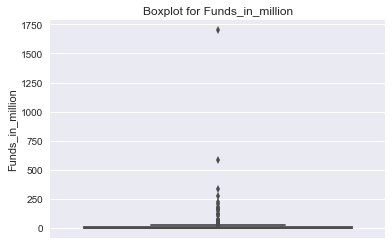

In [163]:
# C. Plot box plot for funds in million. 
#sns.set_theme(style="whitegrid")
sns.boxplot(y=df1['Funds_in_million']).set_title('Boxplot for Funds_in_million');


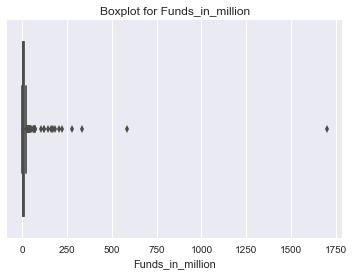

In [164]:
#other way
sns.boxplot(x=df1['Funds_in_million']).set_title('Boxplot for Funds_in_million');

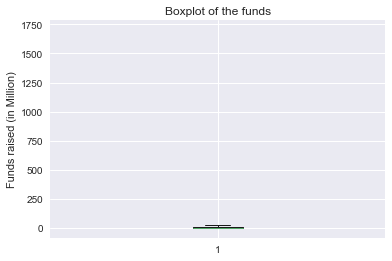

In [165]:
%matplotlib inline
from matplotlib import pyplot as plt

plot = plt.boxplot(df1.Funds_in_million)
plt.title('Boxplot of the funds')
plt.ylabel("Funds raised (in Million)")

plt.show()

Funds_in_million has outliers.

As Per Box Plot, 

25% → Q1

50% → Q2

75% → Q3

Inter Quantile range → I.Q.R=Q3−Q1

Upper range → Q3+(1.5∗IQR) → Q3+1.5∗(Q3−Q1)

Lower range → Q1−(1.5∗IQR) → Q1+1.5∗(Q3−Q1)

D. Check the number of outliers greater than the upper fence. [1 Mark]

In [166]:
# D. Check the number of outliers greater than the upper fence
df1['Funds_in_million'].describe(include='all')

count     446.000000
mean       17.241489
std        90.483710
min         0.005000
25%         0.745250
50%         2.200000
75%         9.475000
max      1700.000000
Name: Funds_in_million, dtype: float64

In [167]:
q3 = 9.475
q1 = 0.745
iqr = q3-q1
upper_range = q3 + (1.5*iqr)
lower_range = q1 - (1.5 * iqr)
print('Upper Range :', upper_range)
print('Lower Range :', round(lower_range,2))

Upper Range : 22.57
Lower Range : -12.35


In [168]:
#other way
upper_fence = plot['caps'][1].get_data()[1][1]   # we can use the values from the box plot itself to get the upper fence
upper_fence

22.0

- The number of outliers greater than the upper range is 22.0

In [169]:
# D. Check the number of outliers greater than the upper range
urOutliers = df1.Funds_in_million[df1.Funds_in_million > upper_range].count()
lrOutliers = df1.Funds_in_million[df1.Funds_in_million < lower_range].count()

print(f'Number of outliers greater than the upper fence = {urOutliers}')
print(f'Number of outliers lesser than the lower fence = {lrOutliers}')

Number of outliers greater than the upper fence = 60
Number of outliers lesser than the lower fence = 0


Ideally, we should drop the outliers - but for the given context this seems to be expected as Funds_in_million completely depends on each team.

So, we will proceed further without dropping the outliers.

In [170]:
print(f'Number of outliers = {len(df1[df1.Funds_in_million > upper_fence])}')

df1[df1.Funds_in_million > upper_fence]

Number of outliers = 60


,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24.0
40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9
49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,40.0
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
108,Clickable,clickable.com,$32.5M,TC40 2007,Finalist,Acquired,32.5
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
128,Credit Sesame,creditsesame.com,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4
130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,38.0
132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,37.1


In [171]:
print(f'Number of outliers = {len(df1[df1.Funds_in_million > upper_fence])}')

df1[df1.Funds_in_million > upper_fence]

Number of outliers = 60


,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24.0
40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9
49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,40.0
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
108,Clickable,clickable.com,$32.5M,TC40 2007,Finalist,Acquired,32.5
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
128,Credit Sesame,creditsesame.com,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4
130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,38.0
132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,37.1


- The above 60 records are of companies that have been funded excessively in comparision to the others in the pool
- Let's see the distribution without these outliers

In [172]:
df1.drop(df1[df1.Funds_in_million > upper_fence].index, inplace = True)

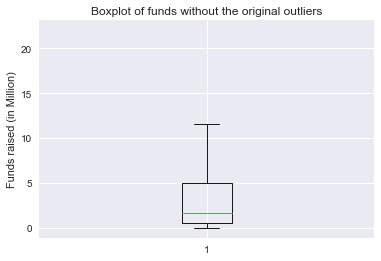

In [173]:
plot = plt.boxplot(df1.Funds_in_million)
plt.title('Boxplot of funds without the original outliers')
plt.ylabel("Funds raised (in Million)")
plt.show()

E. Check frequency of the OperatingState features classes. [1 Mark]

In [174]:
df1['OperatingState'].value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

- Our companies of interest for task 1 are 275 companies that are opearting and 57 that got closed

In [175]:
# Frequency distribution of OperatingState variable by PERCENTAGE
freq = df1['OperatingState'].value_counts(normalize=True).sort_index() * 100
freq

Acquired     14.248705
Closed       14.507772
Operating    71.243523
Name: OperatingState, dtype: float64

In [176]:
len(myStartupData['OperatingState']) # verification of above

662

4. Statistical Analysis: [10 Marks]

A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? [1 Mark]


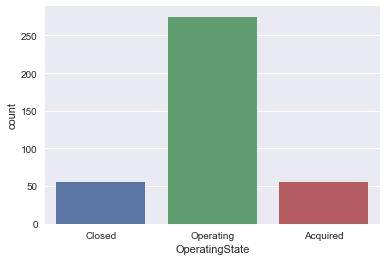

In [177]:
# Plotting distribution plot for companies frequency
sns.countplot(x='OperatingState', data=df1);

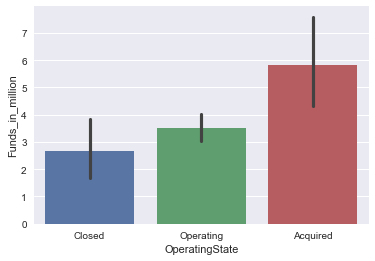

In [178]:
#Plotting bar plot for companies OperatingState & Funds_in_million
sns.barplot(x='OperatingState',y='Funds_in_million', data=df1);

C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


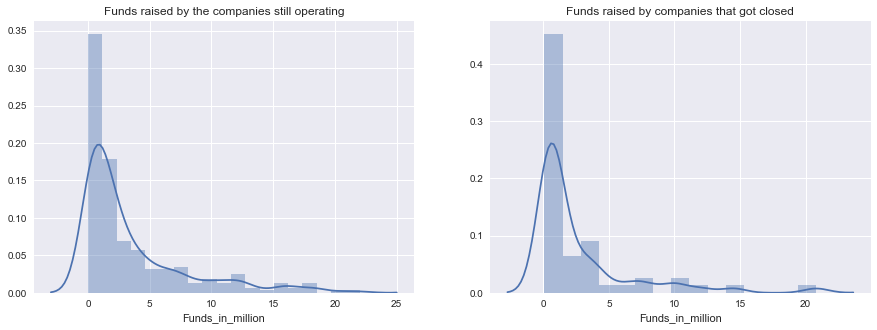

In [179]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(df1.loc[df1.OperatingState == 'Operating', 'Funds_in_million'], ax = ax[0])
sns.distplot(df1.loc[df1.OperatingState =='Closed', 'Funds_in_million'], ax = ax[1])

ax[0].set_title('Funds raised by the companies still operating')
ax[1].set_title('Funds raised by companies that got closed')
plt.show()

In [180]:
# analysis for Funds_in_million in closed companies
# opreating companies
operating_companies = df1[df1.OperatingState == 'Operating']
closed_companies = df1[df1.OperatingState == 'Closed']
closed_companies['Funds_in_million'].describe(),  operating_companies['Funds_in_million'].describe()

(count    56.000000
 mean      2.682423
 std       4.060193
 min       0.093000
 25%       0.443750
 50%       0.927100
 75%       3.125000
 max      20.800000
 Name: Funds_in_million, dtype: float64, count    275.000000
 mean       3.517953
 std        4.430511
 min        0.005000
 25%        0.578050
 50%        1.700000
 75%        4.500000
 max       22.000000
 Name: Funds_in_million, dtype: float64)

- closed_companies funding has mean of 3.26,[round(3.258170 ,2)] and a standard deviation of 5.92 [ round(5.923294 ,2)]
- operating_companies funding has mean of 19.06, [round(19.062186 ,2)] and a standard deviation of 104.68 [round(104.677241 ,2)]

In [181]:
print('closed_companies funding has mean: ',  round(3.258170 ,2), '&& standard deviation (std): ', round(5.923294 ,2))
print('operating_companies funding has mean: ',  round(19.062186 ,2), '&& standard deviation (std): ', round(104.677241 ,2))

closed_companies funding has mean:  3.26 && standard deviation (std):  5.92
operating_companies funding has mean:  19.06 && standard deviation (std):  104.68


- Visually the distributions are quiet similar
- To prove if there is a significant difference or not we will have to perform a hypothesis test
- Since we want to compare the difference in means of the samples, we can either use 2 sample t test or z-test
- For this exercise we shall do both and compare the results
- One thing to notice is that the distributions are not normal yet, since our sample size is reasonably big ( >30 samples), we will go ahead with the aforementioned tests

For the first test, 

**Null hypothesis (Ho)** : There is no difference between the two means

**Alternate hypothesis (Ha)** : There is significant difference between the two means

B. Write the null hypothesis and alternative hypothesis. [1 Mark]

In [182]:
from statsmodels.stats.weightstats import ztest

sample1 = df1.loc[df1.OperatingState == 'Operating', 'Funds_in_million']
sample2 = df1.loc[df1.OperatingState =='Closed', 'Funds_in_million']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
    

	 Since the p-value, 0.192 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


In [183]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


C. Test for significance and conclusion [1 Mark]

In [184]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


- From the tests above we found no evidence to state that the companies that have raised more money tend to suceed more or vice-versa
- The amount of funds a comapny raises is not a significant factor in deciding if the company will remain operational or close down
- We failed to reject the Null Hypothesis(H0 → the mean of funds raised by companies that are operating is equals to the mean of funds raised by companies that are closed.) i.e. with the given data we can't conclude that these two means are different.

D. Make a copy of the original data frame. [1 Mark]

In [185]:
df2 = myStartupData.copy(deep = True)
df2.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


E. Check frequency distribution of Result variables. [1 Mark]

In [186]:
df2.Result.value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

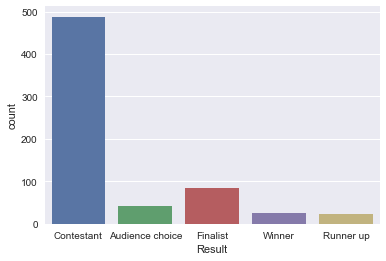

In [187]:
sns.countplot(df2['Result'])

In [188]:
# extra info
# Frequency distribution of Result variable by PERCENTAGE
result_frequency_percentage = (df1.Result.value_counts(normalize=True).sort_index()) * 100
result_frequency_percentage

Audience choice     5.181347
Contestant         73.056995
Finalist           13.471503
Runner up           3.886010
Winner              4.404145
Name: Result, dtype: float64

- There are 488 who remained contestants and the rest came out as something more, we'll call all of them winners for now

F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1 Mark]

In [189]:
winners = df2.Result.value_counts()[1:].sum()
contestants = df2.Result.value_counts()['Contestant']
contestants_operating = df2.OperatingState[df2.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = df2.OperatingState[df2.Result != 'Contestant'].value_counts().loc['Operating']
winners_operating/winners, contestants_operating/contestants

(0.764367816091954, 0.680327868852459)

In [190]:
# F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating 
print('percentage of winners that are still operating is ', round(winners_operating/winners *100,4), "%")
print('percentage of contestants that are still operating is ',round(contestants_operating/contestants * 100,4), "%" )

percentage of winners that are still operating is  76.4368 %
percentage of contestants that are still operating is  68.0328 %


In [191]:
df1.OperatingState.describe()

count           386
unique            3
top       Operating
freq            275
Name: OperatingState, dtype: object

G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]

- There is some difference between the proportion operational companies in the two categories, but let's see if the differnce is significant
- There are two ways we can check if the difference is significant
    - Z-test for proportions
    - Chi-square test
- We shall perform z-test in this case, however, do experiment with Chi-square test and observe if the p-value from both tests gives the same conclusion or not

**Null hypothesis (Ho)**: The proportion of companies that are operating is the same in both categories - winners and contestants

**Alternative hypothesis (Ha)**: The proportion of companies that are operating is significantly different from each other, among the two categories

In [192]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.037 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


H. Test for significance and conclusion [1 Mark]

# Conclusion:
- The amount of funds a company raises is not a significant factor in deciding if the company will remain operational or close down
- Winners in the tech-crunch battle have proven to remain operational more so, than the companies that came out only as contestants
- With a p-value of 0.7232 the difference is not significant.We fail to reject the null hypothesis

- As per proportion test, the difference between these two proportions is not significant. So we failed to reject the null hypothesis.


I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards. [1 Mark]

In [193]:
events = df1[df1.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event  # all the events of relevance
events

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
635        Disrupt NY 2015
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
660        Disrupt SF 2013
Name: Event, Length: 185, dtype: object

### Below is an extra knowledge/extension on the question

In [194]:
#the above events in diffrent cities
NY_events = df1.loc[events[events.apply(lambda x: 'NY' in x)].index, 'Funds_in_million']
SF_events = df1.loc[events[events.apply(lambda x: 'SF' in x)].index, 'Funds_in_million']
EU_events = df1.loc[events[events.apply(lambda x: 'EU' in x or 'London' in x)].index, 'Funds_in_million']
print(len(NY_events), len(SF_events), len(EU_events))

71 74 40


- Each of the three above variables hold the amount of funds with respect to the Cities where the even was organised
- The sample sizes are different across the three categories and it is okay to perform ANOVA on samples of different sizes


**Null Hypothesis(Ho)**: Average funds raised by companies across three cities are the same 

**Alternative Hypothesis(Ha)**: Average funds raised by companies across three cities are the different

C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\divya.d1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


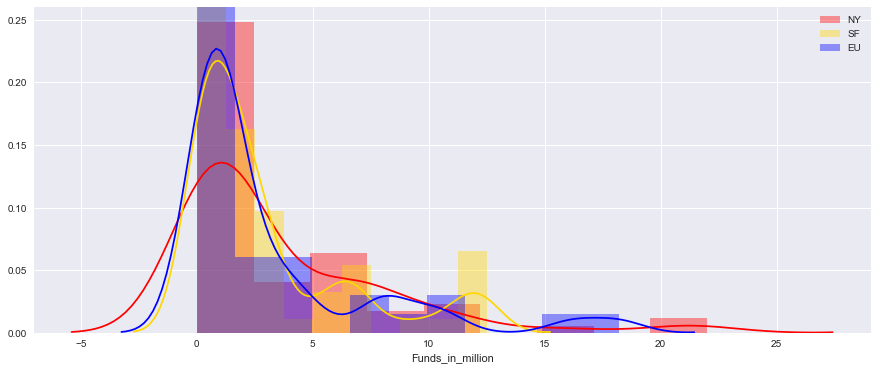

In [195]:
plt.figure(figsize=(15,6))
sns.distplot(NY_events, color = 'Red', label = 'NY')
sns.distplot(SF_events, color = 'Gold', label = 'SF')
sns.distplot(EU_events, color = 'blue', label = 'EU')
plt.legend()
plt.show()


- Visually the distributions look quiet similar
- The Modes of the three distributions are quiet the same
- Dispersion in NY quiet high compared to the others
- Let's see what the test says

In [196]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(NY_events, SF_events, EU_events)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.628 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


- The distribution of funds raised by the companies across the three regions is the same
- We found no evidence to say companies participating in certain regions have funds either significantly on the higher side or on the lower side